# Lending Club Case Study

##### Group Members: 
1. Anirudh Grover
2. Balaji Pandur Venkatesan

##  Assignment Brief

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Our objective is to __identify the risky loan applicants at the time of loan application__. So that such loans can be reduced and thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

# <center>Importing Required Libraries</center>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Setting plots theme and default size
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# <center>Data Sourcing</center>


#### Reading below file in pandas dataframes
- loan.csv

In [2]:
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# <center>Data Cleaning</center>

### 1. Fixing Rows
- There is no need to fix rows in data as there are no extra, summary or incorrect rows

### 2. Fixing Columns
- There is no need to add or rename columns as columns are already given meaningful names according to data dictionary.
- There are no misaligned columns so no need to take care of this.
- There are some columns that can be dropped which we will be dropping below in code as they are not required for analysis.

#### Dropping Columns based on null proportion

Before fixing each column based on its significance, we will be dropping columns based on the proportion of null values to decrease the number of columns to be analyzed. 

As we have 111 columns and analyzing each of them one by one will be a cumbersome process. 

In the below code, we will be dropping columns with very high null values i.e. columns with more than 40% null values.

In [3]:
# Number of rows and column in original data
loan.shape

(39717, 111)

As we can see in above cell output that there are total of 111 columns in our dataset. Now, we will drop columns having high proportion of null values.

In [4]:
# Defining Function which returns columns having null values in dataframe

def nullProportion(df):

    # Calculating null proportions for each column
    proportion = round((df.isnull().sum()/df.shape[0])*100,2)
    
    # Filtering out columns without null values
    proportion = proportion[proportion!=0]
    
    # Printing null proportions for each column of loan dataframe
    print(proportion)
    
    # Returning proportion of each column for further use
    return proportion   

In [5]:
# Printing and storing columns having nulls of loans dataframe
loanNullProportion = nullProportion(loan)

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64


As we can see in the above cell, there are many columns with missing values.

Hence, we will drop those columns which are having more than 40% missing values.

In [6]:
# Fetching columns of loan dataframe having more than 40% values as null and printing head of it
nullColumnList = loanNullProportion[loanNullProportion>40]
nullColumnList.head(10)

mths_since_last_delinq          64.66
mths_since_last_record          92.99
next_pymnt_d                    97.13
mths_since_last_major_derog    100.00
annual_inc_joint               100.00
dti_joint                      100.00
verification_status_joint      100.00
tot_coll_amt                   100.00
tot_cur_bal                    100.00
open_acc_6m                    100.00
dtype: float64

In [7]:
# Dropping all columns having more than 40% values as null
loan.drop(nullColumnList.index, axis=1, inplace=True)

In [8]:
# Printing shape of loan dataset
loan.shape

(39717, 54)

As we can clearly see that we have got rid of more than 50% columns i.e. 57 columns from loan dataframe. 
But still there are lot of columns remaining. So we will now try to further decrease the columns before handling null values for each of them seperately.

We will start cleaning by identifying which columns are not required according to business use-case.

In [9]:
# Printing names of the remaining columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### After reading the requirements and all checkpoints, we came to conclusion that these columns will not be required and hence we will be dropping following columns :

#### Columns To Be Dropped : 

- __emp_title__ - Various individual will have different employment types and hence there title may vary. As we don't have any mapping of their job title with their salary range, we cannot use the column for analysis and hence discarded. 
- __url__ - URL is of no significance.
- __desc__ - Description of loan is not required in our case as we will not be applying any kind of text analysis.
- __title__ - Title of loan is not required in our case as we will not be applying any kind of text analysis.
- __revol_bal__ - This tells the total credit revolving balance. This is insignificant as default rate doesn't depend on the total balance, it depends on how much utilization is done. We already have a column which tells the revolving balance utilization rate. Hence, this should be dropped.
- __out_prncp__ - Remaining outstanding principal for total amount funded is not required as we will not be considering currently ongoing loans.
- __out_prncp_inv__ - Remaining outstanding principal for portion of total amount funded by investors is not required as we will not be considering currently ongoing loans.
- __total_pymnt__ - Payments received to date for total amount funded. This information won't help us in the analysis as it doesn't relate to the probability of defaulting. Hence, dropping.
- __total_pymnt_inv__ - Payments received to date for portion of total amount funded by investors. This column is very similar to total_pymnt column, so it doesn't provide any additional information. Hence, dropping this column.
- __total_rec_prncp__ - Principal received to date. This is insignificant to our case, as chances of defaulting can't be predicted using this column because principal amount is different for different loans. Hence, we will drop this column.
- __total_rec_int__ - Interest received to date. Dropping this, as this column is directly related to the pricipal amount and interest rate. It doesn't add any information to our analysis.
- __recoveries__ - Post Charge Off gross recovery. Recoveries only occur if someone has defaulted. We need to find out reasons to default, not the consequences. Hence, this should be dropped.
- __collection_recovery_fee__ - Post charge off collection fee. This fee is related to recoveries and recovery will only happen in case of charge off. So, it doesn't help to find out the reason for defaulting. Hence, dropping it.
- __last_pymnt_d__ - The month on which last payment was received. This cannot be known beforehand as this is data about the loan taken from Lending Club.
- __last_pymnt_amnt__ - Last payment amount received. This cannot be known beforehand as this is data about the loan taken from Lending Club. 
- __last_credit_pull_d__ - Dropping it as it does not provide any significance in our case as chances of a customer to default does not depend on when their credit rating was pulled by bank.
- __policy_code__ - Dropping it as what policy is applied has no significane with chances of a customer to default.

In [10]:
# Now, we will create a list of above mentioned insignificant columns
insignificantColumnsList = ['emp_title', 'url','desc','title','revol_bal','out_prncp','out_prncp_inv','total_pymnt',
                            'total_pymnt_inv','total_rec_prncp','total_rec_prncp','total_rec_int','recoveries',
                            'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','policy_code']

# Dropping all insignificant columns using insignificantColumnsList
loan.drop(insignificantColumnsList, axis=1, inplace=True)

In [11]:
# Printing shape of loan dataset
loan.shape

(39717, 37)

As we can clearly see that we have got rid of 17 insignificant columns from loan dataframe.
Now we can go back to analysing the columns which can still be dropped.

We can analyse columns of loan dataset to identify the columns having following number of unique values :

Single Unique Value - If it's a categorical column having single unique value then it can be dropped as it will not add any information to our analysis. Because it's a categorical column we can only perform group by operation on it and in this case there will be a single group only. Hence, we cannot compare the group with any other group so there is no additional information we are gaining in this case.

Two Unique Values - In this case if the column is categorical, we have to check if one of the unique values is a NaN value and if it is then it will again act as a single unique value case with only one group and hence no significance.

In [12]:
# Printing number of unique values for each column and filtering out columns with only one or two unique values and saving
# the name of columns in a list
singleGroupColumns = []

for column in loan.columns:
    
    # Fetching count of unique values for each columns including null values
    uniqueCount=loan[column].nunique(dropna=False)
    
    # Filtering only those columns where unique count is one or two
    if uniqueCount<=2:
        print(column + " : " + str(uniqueCount))
        singleGroupColumns.append(column)

term : 2
pymnt_plan : 1
initial_list_status : 1
collections_12_mths_ex_med : 2
application_type : 1
acc_now_delinq : 1
chargeoff_within_12_mths : 2
delinq_amnt : 1
tax_liens : 2


As we can see in above output, the list of columns having 1 or 2 unique values.<br> Now we will further analyse these columns to decide which one to drop among them.

Below we will print the names of the above columns with there respective unique values. 

In [13]:
for column in singleGroupColumns:
    
    # For each column fetching list of unique value and mapping the value to string type
    uniqueValues = map(str,loan[column].unique())
    
    # Converting uniqueValues List to comma seperated String values
    uniqueValues = ",".join(uniqueValues)
    
    # Printing column name with it's corresponding unique values
    print(column+" : "+uniqueValues)

term :  36 months, 60 months
pymnt_plan : n
initial_list_status : f
collections_12_mths_ex_med : 0.0,nan
application_type : INDIVIDUAL
acc_now_delinq : 0
chargeoff_within_12_mths : 0.0,nan
delinq_amnt : 0
tax_liens : 0.0,nan


#### We can infer the following information from the above cell output:<br><br>

- __term__ : Two unique values with none of them is NaN. Hence, <span style="color:blue">__should not be dropped__</span>.<br><br>
- __pymnt_plan__ : Categorical column with single unique value. Hence, <span style="color:red">__should be dropped__</span>.<br><br>
- __initial_list_status__ : Categorical column with single unique value. Hence, <span style="color:red">__should be dropped__</span>.<br><br>
- __collections_12_mths_ex_med__ : Two unique values with one of them is NaN. This tells the number of collections in 12 months excluding medical collections. Even if we drop the NaN it will only have 0.0 as values, which will have no significance. Hence, this <span style="color:red">__should be dropped__</span>.<br><br>
- __application_type__ : Categorical column with single unique value. Hence, <span style="color:red">__should be dropped__</span>.<br><br>
- __acc_now_delinq__ : Column with single unique value. This tells the number of accounts on which the borrower is now delinquent. All of the values in this column is 0, which won't add any information. Hence, it <span style="color:red">__should be dropped__</span>.<br><br>
- __chargeoff_within_12_mths__ : Two unique values with one of them is NaN. This tells the number of charge-offs within 12 months. Even if we drop the NaN it will only have 0.0 as values, which will have no significance. Hence, this <span style="color:red">__should be dropped__</span>.<br><br>
- __delinq_amnt__ : Column with single unique value. This tells the past-due amount owed for the accounts on which the borrower is now delinquent. All of the values in this column is 0, which won't add any information. Hence, it <span style="color:red">__should be dropped__</span>.<br><br>
- __tax_liens__ : Two unique values with one of them is NaN. This tells the number of tax liens. Even if we drop the NaN it will only have 0.0 as values, which will have no significance. Hence, this <span style="color:red">__should be dropped__</span>.<br><br>

From the above cell, we determined which columns among Single and Two Unique valued columns, which one should be dropped.

In the below code we would be dropping the required columns

In [14]:
# List of columns to be dropped
columnsToBeDropped = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','application_type','acc_now_delinq',
                      'chargeoff_within_12_mths','delinq_amnt','tax_liens']

# Dropping the above columns from loan dataframe
loan.drop(columnsToBeDropped, axis=1, inplace=True)

In [15]:
# Printing shape of loan dataset
loan.shape

(39717, 29)

Now that we have completed with dropping the columns.

We will now move on to verifying whether the __id__ column is unique or not. As we know from our business case, we have records about the loans issued through the time period 2007 to 2011. So, according to that __id__ (i.e. loan id) should be the primary key for our loan dataframe.

In [16]:
# Checking no. of unique values for the id column and total no. of records in loan dataframe
print("Unique IDs: "+ str(loan.id.nunique(dropna=False)))
print("Total no. of records: "+ str(loan.shape[0]))

Unique IDs: 39717
Total no. of records: 39717


We can clearly see in the above cell output that no. of unique values in __id__ column is same as the total no. of records.<br>
<mark>Hence, we can use __id__ column as the primary key for our loan dataframe.</mark>

Now, we are done with Fixing Rows and Columns. Let's move on to Treating Missing Values.

# <center>Treating Missing Values<center>

In [17]:
# Saving the original number of rows in loan dataframe
originalRows = loan.shape[0]

#### Checking the missing data for all columns of loan dataframe and percentage of missing values for further data cleaning process

In [18]:
# Printing columns which are having null values in loan dataframe
loanNullProportion = nullProportion(loan)

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64


In the above cell, we can find the list of columns having missing values. The proportion of missing values for all columns is very-small, so we can consider dropping the rows having missing values rather than imputing the values. 
As imputing the missing values may introduce bias to our analysis.

In [19]:
# Dropping the rows having null values
loan.dropna(inplace=True)

Checking proportion of missing data in columns of loan dataframe after dropping rows containing nulls

In [20]:
loanNullProportion = nullProportion(loan)

Series([], dtype: float64)


As we can see in above cell output, nullProportion function is returning blank which means we have dealt with all nulls in dataframe.

In below cell, let's see the percentage of rows retained from original data.

In [21]:
# Determining number of rows retained in loan dataframe
retainedRows = loan.shape[0]

# Printing percentage of rows retained from original data
(retainedRows/originalRows)*100

95.42009718760228

As we can see that we have approx 95% of rows from the original data which means we have only lost about 5% of rows. So it won't affect our analysis as percentage of retained rows is very high.

Now, we are done with Treating Missing Values. Let's move on to Standardising values.

# <center>Standardise Values</center>

Now, we will start with standardising the values so that all the values in the dataframe would have a standard format.

Let's start with analyzing all the columns in our loan dataframe.

In [22]:
# Setting option to display max of 100 columns
pd.options.display.max_columns = 100

# Displaying sample of loan dataframe
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
15780,741803,939799,12000,12000,11750.000000,60 months,8.49%,246.15,A,A5,10+ years,MORTGAGE,108000.0,Not Verified,May-11,Fully Paid,credit_card,335xx,FL,6.83,0,Aug-87,0,8,0,21.40%,18,0.000000,0.0
13742,777019,979456,18000,18000,18000.000000,36 months,18.79%,657.90,E,E3,< 1 year,RENT,90000.0,Source Verified,Jun-11,Fully Paid,credit_card,802xx,CO,13.93,0,Oct-03,1,10,0,89.10%,17,0.000000,0.0
19988,664023,849077,25000,25000,24700.000000,36 months,13.06%,843.08,C,C2,6 years,MORTGAGE,168000.0,Verified,Feb-11,Fully Paid,other,339xx,FL,8.53,0,Nov-88,2,9,0,2.50%,20,0.000000,0.0
34257,454194,562207,5000,5000,5000.000000,36 months,12.53%,167.34,B,B5,< 1 year,RENT,16320.0,Not Verified,Nov-09,Charged Off,other,984xx,WA,4.85,0,Oct-06,3,10,0,11.80%,10,0.000000,0.0
9622,845476,1056678,20000,20000,19975.000000,60 months,16.49%,491.59,D,D3,10+ years,MORTGAGE,60000.0,Verified,Aug-11,Charged Off,debt_consolidation,553xx,MN,16.16,0,Nov-96,3,13,0,71.90%,27,0.000000,0.0
4585,999951,1225552,4500,4500,4500.000000,36 months,6.62%,138.17,A,A2,10+ years,MORTGAGE,125000.0,Verified,Oct-11,Fully Paid,renewable_energy,604xx,IL,4.16,0,Nov-97,1,8,0,26.80%,23,0.000000,0.0
31456,493393,631236,24000,24000,23478.615110,36 months,10.62%,781.44,B,B3,10+ years,MORTGAGE,320000.0,Verified,Mar-10,Charged Off,credit_card,949xx,CA,4.32,1,Jul-88,1,12,0,8.90%,27,39.039423,0.0
3902,1010801,1237636,15000,15000,14750.000000,60 months,13.49%,345.08,C,C1,7 years,MORTGAGE,94000.0,Source Verified,Nov-11,Current,credit_card,630xx,MO,12.05,1,Jan-88,0,7,0,67.20%,50,0.000000,0.0
33854,460863,575617,9600,9600,9581.207856,36 months,13.57%,326.10,C,C3,3 years,RENT,28080.0,Not Verified,Nov-09,Fully Paid,major_purchase,560xx,MN,4.66,0,Aug-03,1,11,0,35%,15,0.000000,0.0
21197,637884,817115,22500,22500,22475.000000,60 months,17.80%,568.91,F,F1,10+ years,MORTGAGE,103875.0,Verified,Jan-11,Fully Paid,credit_card,765xx,TX,13.53,0,Aug-87,2,9,0,79.40%,28,0.000000,0.0


After analysing the above cell output, we came to conclusions that there are various types of standardizing issues in our dataset which are as follows :
1. Non-standard Precision in columns having floating values
2. Extra characters in text columns i.e. zip_code
3. Non-standard case in string columns
4. Remove '%' signs from columns and fix precision
5. Round int_rate to nearest integer.

__Non-Standard Precision__ : The floating values can be overly precised or might not have any standard precision. So, we will standardize the precision to 2 decimal places. 

Now, we will select only those columns that are having floating values and round them to 2 decimal points.   

In [23]:
# Selecting names of columns having floating values
floatColumns = loan.select_dtypes(include='float64').columns

# Rounding float columns to 2 decimal places and assigning them loan dataframe
loan[floatColumns] = loan[floatColumns].apply(lambda x : round(x,2),axis=1)

In [24]:
# Verifying if non-standard precision issue is resolved
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
10664,829338,1038436,35000,35000,34975.00,60 months,18.39%,896.22,E,E2,3 years,MORTGAGE,85000.0,Verified,Jul-11,Fully Paid,other,488xx,MI,11.04,0,Sep-92,2,11,0,15.60%,24,0.0,0.0
20198,662462,847155,9600,9600,9600.00,36 months,5.79%,291.14,A,A2,1 year,MORTGAGE,65000.0,Not Verified,Feb-11,Fully Paid,home_improvement,601xx,IL,9.42,0,Dec-99,1,6,0,8.90%,14,0.0,0.0
4227,1004332,1230950,13200,13200,13200.00,36 months,6.62%,405.29,A,A2,10+ years,MORTGAGE,90000.0,Source Verified,Nov-11,Fully Paid,debt_consolidation,851xx,AZ,3.03,0,Jan-99,1,10,0,31.20%,29,0.0,0.0
4114,1005957,1232535,23000,23000,22975.00,60 months,10.65%,496.08,B,B2,1 year,MORTGAGE,69500.0,Verified,Nov-11,Fully Paid,debt_consolidation,802xx,CO,14.45,0,Oct-00,0,9,0,29.20%,22,0.0,0.0
19074,682162,871287,25000,25000,24993.13,60 months,15.65%,603.32,D,D4,3 years,MORTGAGE,160000.0,Verified,Feb-11,Fully Paid,other,276xx,NC,13.45,0,Apr-92,1,5,0,63.20%,22,0.0,0.0


As we can see from the above output that we have solved the non-standard precision issue. Now, let's proceed to handle extra characters in text columns.

__Extra characters in text columns__ : In zip_code column, there are trailing extra characters which needs to be removed.

Here, we will select only the first 3 characters in the __zip_code__ column to remove the extra characters.

In [25]:
# Selecting the first 3 characters from vales of zip_code column
loan['zip_code'] = loan.zip_code.apply(lambda x : x[:3])

# Verifying if extra characters have been handled
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
3236,1022460,1251255,18000,18000,18000.0,36 months,12.69%,603.81,B,B5,8 years,MORTGAGE,180396.0,Source Verified,Nov-11,Fully Paid,major_purchase,554,MN,6.21,0,Jun-01,1,10,0,49.30%,37,0.00,0.0
4404,989598,1213764,6625,6625,6625.0,60 months,14.27%,155.09,C,C2,6 years,MORTGAGE,25995.0,Verified,Nov-11,Current,debt_consolidation,631,MO,24.68,0,Aug-03,3,8,0,72%,26,14.96,0.0
3069,1026192,1255344,10000,10000,10000.0,36 months,11.71%,330.76,B,B3,5 years,RENT,48132.0,Source Verified,Nov-11,Fully Paid,debt_consolidation,662,KS,17.80,0,Nov-98,0,15,0,23%,25,0.00,0.0
19397,676204,864160,21000,21000,21000.0,36 months,10.37%,681.27,B,B3,4 years,RENT,200000.0,Source Verified,Feb-11,Fully Paid,debt_consolidation,941,CA,8.25,0,Aug-85,0,10,0,24%,16,0.00,0.0
35700,431744,512686,2500,2500,2400.0,36 months,12.53%,83.67,B,B5,10+ years,RENT,38060.0,Verified,Aug-09,Fully Paid,other,027,MA,10.97,0,Jul-97,0,12,0,56.60%,23,0.00,0.0


We can see from the above cell output, extra characters issue in text columns is resolved. Now, let's resolve non-standard case issue in string columns.

__Non-standard case in string columns__ : String (object) columns have a non-standard case and we will standardize the case to lowercase for all string columns.

Now, we will select the columns having object datatype and standardize them to lowercase.

In [26]:
# Selecting column names having object datatype
objectColumns = loan.select_dtypes('object').columns

# Converting object type columns to lowercase i.e standardizing the case to lowercase
loan[objectColumns] = loan[objectColumns].apply(lambda x : x.str.lower(), axis=1)

In [27]:
# Verifying if non-standard case issue is resolved
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
30428,507907,655165,19400,19400,19400.0,36 months,16.07%,682.77,d,d5,3 years,mortgage,316800.0,not verified,may-10,fully paid,debt_consolidation,077,nj,7.25,0,jan-95,0,11,0,88.70%,26,0.0,0.0
226,1065648,1299754,7000,7000,6975.0,60 months,11.71%,154.69,b,b3,6 years,mortgage,69600.0,verified,dec-11,charged off,credit_card,981,wa,26.22,0,oct-79,0,10,0,90.90%,23,0.0,0.0
11259,817747,1025616,5000,5000,4975.0,36 months,5.99%,152.09,a,a2,4 years,mortgage,73000.0,source verified,jul-11,fully paid,debt_consolidation,087,nj,19.50,0,may-88,0,12,0,28%,63,0.0,0.0
28492,535351,691768,12000,12000,12000.0,60 months,17.93%,304.27,e,e5,10+ years,mortgage,72000.0,not verified,jun-10,charged off,vacation,967,hi,23.62,1,apr-96,1,21,0,43.40%,32,0.0,0.0
31704,492092,629195,6800,6800,6800.0,36 months,10.62%,221.41,b,b3,< 1 year,own,45000.0,not verified,mar-10,fully paid,debt_consolidation,117,ny,6.59,0,nov-03,3,17,0,6.20%,21,0.0,0.0


We can see from the above cell output that string columns has been standardized. Now, we can proceed with removing % signs from columns representing percentages and fix their precision to 2 decimal places.

__Remove '%' signs from columns and fix precision__ : Columns which are representing percentage values are having trailing '%' sign, which needs to removed. So, we will now remove the '%' sign and standardize their precision to 2 decimal places.

Following are the columns which represent percentage values :
1. int_rate
2. revol_util

Let's select both of these columns and resolve the '% sign issue.

In [28]:
# Removing % sign and converting datatype to float
loan[['int_rate','revol_util']] = loan[['int_rate','revol_util']].apply(lambda x : x.str[:-1]).astype('float64')

# Rounding values to 2 decimal precision and assigning to loan dataframe
loan[['int_rate','revol_util']] = loan[['int_rate','revol_util']].apply(lambda x : round(x,2))

In [29]:
# Verifying if '%' sign is removed
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
19975,666215,851767,7200,7200,7200.00,36 months,5.42,217.16,a,a1,6 years,rent,42000.0,verified,feb-11,fully paid,debt_consolidation,917,ca,27.31,0,sep-95,0,9,0,8.3,14,0.0,0.0
34340,453280,560247,20000,20000,19339.24,36 months,14.96,692.90,d,d2,< 1 year,rent,54000.0,not verified,nov-09,fully paid,debt_consolidation,117,ny,11.78,0,feb-05,1,8,0,59.9,11,0.0,0.0
3504,1017348,1245319,28000,28000,27997.57,60 months,20.30,746.52,e,e5,10+ years,rent,55000.0,source verified,nov-11,fully paid,debt_consolidation,853,az,12.76,0,sep-95,0,4,0,39.3,30,0.0,0.0
6718,893194,1110261,10000,10000,10000.00,36 months,7.90,312.91,a,a4,< 1 year,rent,40000.0,source verified,sep-11,fully paid,other,916,ca,5.34,0,aug-01,1,18,0,6.9,32,0.0,0.0
3719,1014352,1241935,22125,22125,21975.00,60 months,13.49,508.98,c,c1,1 year,mortgage,50000.0,verified,nov-11,charged off,debt_consolidation,265,wv,27.43,1,jun-99,0,6,0,87.0,23,0.0,0.0


We can see in the above cell output that we have removed the '%' sign in columns representing percentages.

__Round int_rate to nearest integer value__: Now we will convert int_rate column from decimal to integer so that it gets rounded to nearest integer for ease of analysis.

In [30]:
loan['int_rate'] = loan['int_rate'].apply(lambda x:int(round(x,0)))

Now, we have resolved all types of standardizing issues in our dataset. We will now proceed with fixing invalid values.

# <center>Fixing Invalid Values</center>

Our data might be filled with many invalid values. Now, we will start fixing those invalid values.

First, we will look at the datatypes of every column and analyze them.

In [31]:
# Printing datatypes of all the columns in loan dataframe
loan.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                  int64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util              float64
total_acc                 int64
total_rec_late_fee      float64
pub_rec_bankruptcies    float64
dtype: object

Let's also check sample of the dataframe and see whether they are matching with their current datatype

In [32]:
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies
30559,506504,653004,10000,10000,10000.00,36 months,19,366.78,f,f3,10+ years,rent,96000.0,verified,apr-10,fully paid,debt_consolidation,331,fl,20.77,1,jan-90,1,17,0,67.0,23,18.34,0.0
19797,669286,855754,3000,3000,2950.00,36 months,10,96.81,b,b2,1 year,rent,14400.0,source verified,feb-11,fully paid,car,782,tx,19.33,0,jun-05,3,9,0,24.1,14,0.00,0.0
14818,759491,959738,15000,15000,15000.00,60 months,15,355.20,c,c4,3 years,rent,49992.0,not verified,may-11,fully paid,debt_consolidation,112,ny,22.28,0,may-02,1,14,0,56.5,28,0.00,0.0
37575,377773,402168,15000,15000,6996.56,36 months,13,504.27,c,c2,6 years,mortgage,70400.0,not verified,feb-09,fully paid,educational,063,ct,11.42,0,aug-95,1,17,0,73.7,38,0.00,0.0
29221,523827,677794,5500,5500,5496.18,60 months,19,141.68,f,f2,3 years,rent,50000.0,not verified,jun-10,fully paid,wedding,945,ca,7.44,1,sep-04,0,3,0,38.4,5,0.00,0.0
24430,600757,771007,12000,12000,11795.52,36 months,6,363.93,a,a2,9 years,mortgage,120000.0,verified,oct-10,fully paid,debt_consolidation,606,il,19.53,0,sep-99,2,21,0,5.2,57,0.00,0.0
30501,506856,653574,10750,10750,10725.00,36 months,13,362.76,c,c2,10+ years,mortgage,53000.0,not verified,apr-10,fully paid,debt_consolidation,481,mi,14.02,0,dec-85,0,6,0,58.8,28,0.00,0.0
6083,974392,1196468,20000,20000,19750.00,36 months,11,651.47,b,b2,5 years,mortgage,130000.0,verified,oct-11,fully paid,credit_card,951,ca,12.50,0,dec-00,0,13,0,59.3,32,0.00,0.0
38137,363955,374161,5000,5000,4375.27,36 months,8,156.69,a,a3,< 1 year,own,19500.0,not verified,nov-08,fully paid,debt_consolidation,444,oh,9.23,0,aug-94,2,5,0,25.4,11,0.00,0.0
23669,609986,782353,6500,6500,6450.00,36 months,13,217.80,c,c2,< 1 year,rent,36000.0,source verified,nov-10,fully paid,credit_card,941,ca,11.70,2,may-04,1,10,0,83.1,21,0.00,0.0


From the above cell output, we infer the following conclusions : 

1. issue_d - Convert to more presentable format and derive month as well as year column from it.
2. earliest_cr_line - Convert to more presentable format and derive month as well as year column from it.
3. pub_rec_bankruptcies - Convert to Integer datatype as it represents the number of public record bankruptcies.
4. We can implement this business rule :
    - Requested Loan >= Lending Club Loan Suggestion >= Actual Loan Provided <br>
        __loan_amnt    >=          funded_amnt         >= funded_amnt_inv__

Let's write a function to convert the date representing columns and extracting month and year from it

In [33]:
# Importing datetime library
import datetime as dt

def convDatetoMonthYear(dateColumns):
    for column in dateColumns:
        # Converting issue_d to datetime
        loan[column] = loan[column].apply(lambda x : dt.datetime.strptime(x,"%b-%y"))

        # Generating the derived columns for month & year
        loan[column+"_month"] = loan[column].apply(lambda x : x.strftime("%b"))
        loan[column+"_year"] = loan[column].dt.year

        # Formatting the datetime column to the required format
        loan[column] = loan[column].apply(lambda x : x.strftime("%b, %Y"))

__Converting date representing columns to more presentable format and extracting month number and year from it__

In [34]:
# Creating a list to contain the date representing columns
dateColumns = ['issue_d','earliest_cr_line']

# Applying convDatetoMonthYear function to dateColumns
convDatetoMonthYear(dateColumns)

In [35]:
# Verifying the formatted and derived columns 
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
24985,572573,736493,25000,25000,24825.00,36 months,11,819.89,b,b3,5 years,rent,83000.0,not verified,"Oct, 2010",fully paid,debt_consolidation,112,ny,9.31,0,"Apr, 2000",0,5,0,49.1,15,0.0,0.0,Oct,2010,Apr,2000
37579,375510,397802,8000,8000,7921.52,36 months,17,285.02,e,e5,2 years,mortgage,249000.0,verified,"Feb, 2009",fully paid,other,217,md,8.46,0,"Feb, 1995",3,12,0,96.5,33,0.0,0.0,Feb,2009,Feb,1995
4851,996011,1220612,15025,15025,15025.00,36 months,6,457.30,a,a1,10+ years,mortgage,49200.0,verified,"Nov, 2011",fully paid,small_business,338,fl,29.92,0,"Jan, 1985",0,9,0,15.6,39,0.0,0.0,Nov,2011,Jan,1985
25132,535823,692316,15000,15000,13550.00,60 months,17,374.33,e,e3,5 years,own,83600.0,not verified,"Oct, 2010",fully paid,small_business,221,va,3.98,1,"Dec, 1997",3,11,0,28.4,28,0.0,0.0,Oct,2010,Dec,1997
33403,468777,590677,11200,11200,11175.00,36 months,14,384.23,c,c5,1 year,rent,48000.0,not verified,"Dec, 2009",fully paid,other,100,ny,12.55,0,"Sep, 2004",0,4,0,82.5,8,0.0,0.0,Dec,2009,Sep,2004


As we can see, we formatted issue_d column to more presentable format. Also, we derived month and year columns from it.

Now, we will convert __pub_rec_bankruptcies__ column to integer datatype as it represents the number of public record bankruptcies.

In [36]:
# Converting pub_rec_bankruptcies to integer datatype
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('int32')

In [37]:
# Verifying the conversion of pub_rec_bankruptcies to integer
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
6241,971708,1193447,23000,23000,23000.00,60 months,12,516.52,b,b4,10+ years,mortgage,39000.0,verified,"Oct, 2011",charged off,small_business,620,il,7.88,0,"Jan, 1994",1,10,0,24.5,29,0.01,0,Oct,2011,Jan,1994
19230,679146,867594,11000,11000,10850.00,60 months,10,235.73,b,b3,2 years,mortgage,234000.0,verified,"Feb, 2011",fully paid,debt_consolidation,665,ks,4.30,0,"May, 1993",2,13,0,13.5,30,0.00,0,Feb,2011,May,1993
18012,706750,898994,4000,4000,4000.00,36 months,10,129.77,b,b3,3 years,mortgage,35000.0,verified,"Apr, 2011",fully paid,debt_consolidation,302,ga,18.62,0,"Dec, 2000",1,19,0,60.2,37,0.00,0,Apr,2011,Dec,2000
35875,428096,506243,8000,8000,7551.85,36 months,13,268.95,c,c2,< 1 year,own,45000.0,not verified,"Jul, 2009",fully paid,debt_consolidation,194,pa,8.32,0,"Oct, 2003",0,3,0,76.6,8,0.00,0,Jul,2009,Oct,2003
24928,592018,760371,7500,7500,7450.00,60 months,11,163.52,b,b3,4 years,rent,57600.0,not verified,"Oct, 2010",fully paid,car,431,oh,7.56,0,"Mar, 2004",0,13,1,6.1,14,0.00,1,Oct,2010,Mar,2004


As we can see, __pub_rec_bankruptcies__ is now converted to integer datatype.<br><br>

Now, let's apply the following business rule and check whether our data is validating the same : <br><br>
Requested Loan >= Lending Club Loan Suggestion >= Actual Loan Provided<br>
i.e. __loan_amnt    >=          funded_amnt         >= funded_amnt_inv__

For this, let's filter out the records which are not following the above business rule.

In [38]:
# Filtering rows which are not following the business rule i.e. loan_amnt >= funded_amnt >= funded_amnt_inv
loan[~(loan['loan_amnt'] >= (loan['funded_amnt']>= loan['funded_amnt_inv']))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year


We can clearly see from the above cell output that there are __no records__ in our dataset which are violating the business rules for the loan amount.

<mark>__Hence, Business Rule is Validated Successfully__</mark>

Also, we can see that the columns __<mark>loan_amnt, funded_amnt & funded_amnt_inv</mark>__ are almost same in most of the cases. So, we should retain only one of them as this would not not provide any additional information to our analysis. 

- __loan_amnt__ - This is the loan amount requested by the borrower. This information is insignificant as the chances of customer to default is dependent on the actual amount of loan provided by the Lending Club rather than the amount requested. So, this column should be dropped. 
- __funded_amnt_inv__ - This is the total amount committed by investors for that loan. This amount is similar to the _funded_amnt_ in almost all the cases. So, this doesn't add any information to our analysis and hence, should be dropped and _funded_amnt_ will be retained. 

So, we will only retain  __funded_amnt__ in our loan dataset.

In [39]:
# Dropping loan_amnt and funded_amnt_inv
loan.drop(['loan_amnt','funded_amnt_inv'],axis=1, inplace=True)

In [40]:
# Verifying the dropped columns
loan.sample(5)

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
7161,886116,1101853,12000,60 months,11,258.82,b,b2,4 years,rent,46800.0,source verified,"Sep, 2011",charged off,home_improvement,234,va,0.38,0,"Nov, 1978",0,4,0,0.0,9,14.89,0,Sep,2011,Nov,1978
36475,407571,457001,15000,36 months,13,508.84,c,c4,4 years,rent,74424.0,verified,"Jun, 2009",fully paid,debt_consolidation,088,nj,11.24,0,"Jun, 2000",0,13,0,53.9,20,0.00,0,Jun,2009,Jun,2000
30388,508739,656472,10000,36 months,8,312.81,a,a5,3 years,mortgage,106000.0,not verified,"May, 2010",fully paid,educational,189,pa,4.61,0,"Dec, 2000",2,15,0,2.2,30,0.00,0,May,2010,Dec,2000
13257,785335,988620,6000,36 months,11,196.41,b,b3,10+ years,mortgage,141000.0,source verified,"Jun, 2011",fully paid,debt_consolidation,940,ca,20.14,0,"Jun, 1995",0,14,0,94.9,30,0.00,0,Jun,2011,Jun,1995
10351,833632,1001853,2100,36 months,10,67.76,b,b1,6 years,mortgage,54000.0,not verified,"Aug, 2011",fully paid,other,450,oh,8.89,0,"Oct, 1993",1,13,1,36.9,22,0.00,0,Aug,2011,Oct,1993


So, we have now dealt with invalid data. Also, we dropped some columns. We can now proceed with Filtering Data.

# <center>Filtering Data</center>

We might need to filter our data in order to get rid of rows which are not required

In the next step of data cleaning, we will check if our data is having any duplicated rows and will remove those duplicated rows if they are present.

In [41]:
# Printing count of duplicated rows (excluding id i.e. Primary Key)
loan.iloc[:,1:].duplicated().sum()

0

As we can see in above cell output, the __number of duplicated rows in loan dataset is 0__ and hence no need to handle them.

Now, we will move on to filter data according to business rules.

__In our loan dataset, following are 3 possible scenarios for loan_status column as described below :__

- __Fully paid :__ Applicant has fully paid the loan (the principal and the interest rate). These are labelled as __'fully paid'__ as they have not defaulted on their loan.

- __Current :__ Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted' and in our column, they are labelled as __'current'__. __Rows belonging to this status can be filtered out from our data__

- __Charged-off :__ Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan and hence labelled as __'charged off'__.

In [42]:
# Printing shape of loan before filtering
loan.shape

(37898, 31)

In [43]:
# Dropping the rows from loan dataset where loan_status is equal to 'current'
loan = loan[~(loan.loan_status=='current')]

In [44]:
# Printing shape of loan after filtering
loan.shape

(36800, 31)

In [45]:
# Verifying unique values in loan_status column
loan.loan_status.unique()

array(['fully paid', 'charged off'], dtype=object)

We can see in above cell output that we got rid of all rows for currently paying loans.

Now we have filtered our loan data for only two categories i.e. Default and Non-Default which are represented in loan_status column as 'charged off' and 'fully paid' respectively.

__We will now create and choose a target boolean column named Defaulted where :__
- 1 represents if a person defaulted on his/her loan
- 0 represents if a person has not defaulted on his/her loan i.e. has done the full payment

In [46]:
# Creating Derived column named Defaulted
loan['Defaulted'] = loan.loan_status.apply(lambda x: 1 if x=='charged off' else 0)

# Dropping the redundant column loan_status
loan.drop('loan_status', axis=1, inplace=True)

In [47]:
# Verifying if the Defaulted column has been created and loan_status column is dropped
loan.sample(10)

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Defaulted
20785,653211,835385,7000,36 months,7,215.89,a,a3,1 year,mortgage,43000.0,source verified,"Jan, 2011",credit_card,029,ri,12.08,0,"May, 1998",1,18,0,23.7,32,0.0,0,Jan,2011,May,1998,0
29878,516874,667995,13175,60 months,8,266.39,a,a5,4 years,mortgage,234996.0,verified,"May, 2010",car,300,ga,12.51,0,"Apr, 1994",0,9,0,12.7,36,0.0,0,May,2010,Apr,1994,0
7735,875973,1090569,5000,36 months,7,154.37,a,a3,10+ years,mortgage,45000.0,verified,"Sep, 2011",major_purchase,606,il,23.41,0,"Jan, 1999",0,5,0,42.2,10,0.0,0,Sep,2011,Jan,1999,0
32891,476447,603530,10000,36 months,8,312.19,a,a3,< 1 year,mortgage,50000.0,not verified,"Jan, 2010",other,026,ma,0.86,0,"Oct, 1995",0,7,0,6.5,16,0.0,0,Jan,2010,Oct,1995,0
32429,482437,613705,9000,36 months,14,306.94,c,c4,< 1 year,rent,43000.0,not verified,"Feb, 2010",debt_consolidation,770,tx,24.00,0,"Sep, 2003",1,4,0,90.8,10,0.0,0,Feb,2010,Sep,2003,0
25535,583513,749808,4000,36 months,16,141.27,d,d5,10+ years,rent,45000.0,source verified,"Sep, 2010",debt_consolidation,067,ct,10.05,0,"Aug, 1986",0,3,0,91.5,29,0.0,0,Sep,2010,Aug,1986,0
10045,838981,1049114,10000,60 months,16,243.13,d,d2,5 years,mortgage,94000.0,source verified,"Aug, 2011",debt_consolidation,974,or,17.77,0,"Nov, 1991",1,9,0,82.9,34,0.0,0,Aug,2011,Nov,1991,0
37416,381334,408184,8000,36 months,13,268.95,c,c2,5 years,rent,81600.0,verified,"Feb, 2009",small_business,605,il,4.97,0,"May, 1998",3,4,0,1.0,26,0.0,0,Feb,2009,May,1998,0
21920,636571,815474,4200,36 months,14,142.98,c,c5,< 1 year,mortgage,31000.0,verified,"Dec, 2010",debt_consolidation,658,mo,21.41,0,"Apr, 1998",0,5,0,94.5,19,0.0,0,Dec,2010,Apr,1998,0
19263,678588,866925,15000,36 months,13,505.85,c,c2,1 year,rent,48000.0,not verified,"Feb, 2011",credit_card,760,tx,20.85,0,"Apr, 2006",0,9,0,64.8,13,0.0,0,Feb,2011,Apr,2006,0


We can see in the above cell output that we have created the __Defaulted__ column and dropped the __loan_status__ column.

We will now modify __verification_status__ values in such a way that all verified loans i.e. verified or source verified will be represented by 'verified' while not verified will remain the same.

In [48]:
# Mapping source verified to verified
loan['verification_status'] = loan.verification_status.apply(lambda x: 'verified' if x=='source verified' else x)

In [49]:
# Validating unique values in verification_status column
loan.verification_status.unique()

array(['verified', 'not verified'], dtype=object)

As, we can see in above cell output, we have mapped source verified values to verified in verification_staus column.

Now we will derive the __age of credit history__ using Earliest Credit Line column and Loan Issue column. This will help in our analysis during later stage.

In [50]:
# Substracting Earliest Credit Line Year from Loan Issue Year to get age of Credit History
loan['age_cr'] = loan['issue_d_year']-loan['earliest_cr_line_year']

In [51]:
# Verifying if age_cr column is created
loan.sample(5)

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Defaulted,age_cr
28525,536504,693102,7750,60 months,18,194.95,e,e4,3 years,mortgage,70000.0,not verified,"Jul, 2010",credit_card,064,ct,21.34,0,"Dec, 1996",1,8,0,99.4,27,15.0,0,Jul,2010,Dec,1996,0,14
6696,893785,1110941,5000,36 months,12,165.38,b,b3,5 years,mortgage,78000.0,verified,"Sep, 2011",other,856,az,23.89,0,"Jul, 2001",0,7,0,94.0,25,0.0,0,Sep,2011,Jul,2001,0,10
2770,1030151,1259550,5600,36 months,8,175.23,a,a4,3 years,rent,32000.0,verified,"Nov, 2011",renewable_energy,284,nc,2.93,0,"Jan, 2006",0,2,0,24.5,8,0.0,0,Nov,2011,Jan,2006,0,5
15569,746589,945372,10000,36 months,8,315.63,a,a5,10+ years,rent,62000.0,not verified,"May, 2011",debt_consolidation,190,pa,6.54,0,"Sep, 1998",0,10,0,62.8,13,0.0,0,May,2011,Sep,1998,0,13
5050,991964,1216398,11000,60 months,18,276.83,d,d4,10+ years,rent,60000.0,verified,"Oct, 2011",debt_consolidation,333,fl,14.46,0,"Jul, 1996",3,8,0,68.4,21,0.0,0,Oct,2011,Jul,1996,1,15


As, we can see in above cell output, we have derived age_cr column.

So, now we will verify logical Business Rule for age of credit history i.e. age cannot be negative which means an account cannot be created after loan is taken.

In [52]:
# Checking if such records exists in which loan is taken before account creation.
loan[loan.age_cr<0]

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Defaulted,age_cr
1764,1042802,1272895,5500,36 months,8,171.11,a,a3,4 years,rent,63000.00,verified,"Dec, 2011",other,902,ca,5.56,2,"Sep, 2068",0,6,0,20.10,15,0.00,0,Dec,2011,Sep,2068,0,-57
3274,1021976,1250746,5000,36 months,13,167.73,b,b5,10+ years,mortgage,72000.00,verified,"Nov, 2011",vacation,151,pa,7.75,0,"Sep, 2067",1,5,0,32.20,25,0.00,0,Nov,2011,Sep,2067,0,-56
3349,1013619,1240971,21000,36 months,13,704.45,b,b5,10+ years,mortgage,267000.00,verified,"Nov, 2011",small_business,801,co,8.87,0,"Feb, 2065",2,10,0,36.80,27,0.00,0,Nov,2011,Feb,2065,0,-54
3403,1017623,1245399,15000,60 months,17,370.94,d,d2,< 1 year,mortgage,58000.00,verified,"Nov, 2011",debt_consolidation,034,nh,22.08,0,"Jun, 2067",0,11,0,89.40,18,0.00,0,Nov,2011,Jun,2067,1,-56
3595,1014199,1241557,35000,60 months,16,850.39,c,c5,10+ years,mortgage,102158.00,verified,"Nov, 2011",major_purchase,334,fl,14.61,0,"Aug, 2067",1,24,0,35.20,55,0.00,0,Nov,2011,Aug,2067,0,-56
4478,1001581,1227382,6000,36 months,6,182.62,a,a1,10+ years,mortgage,96000.00,not verified,"Oct, 2011",car,776,tx,23.80,0,"Mar, 2063",0,11,0,32.00,27,0.00,0,Oct,2011,Mar,2063,0,-52
5092,990789,1214995,27400,60 months,17,684.95,d,d3,10+ years,mortgage,143500.00,verified,"Oct, 2011",debt_consolidation,913,ca,17.63,0,"Aug, 2068",0,16,0,50.30,30,0.00,0,Oct,2011,Aug,2068,1,-57
5673,981627,1204792,16200,60 months,18,413.58,d,d5,5 years,own,47052.00,verified,"Oct, 2011",debt_consolidation,405,ky,19.43,0,"May, 2065",0,6,0,77.00,9,0.00,0,Oct,2011,May,2065,0,-54
6416,966843,1187731,16400,60 months,22,456.22,f,f5,2 years,rent,80000.00,verified,"Oct, 2011",debt_consolidation,334,fl,21.07,0,"Jun, 2068",2,18,1,98.00,31,0.00,1,Oct,2011,Jun,2068,0,-57
7424,880452,1095519,35000,60 months,13,805.17,c,c1,10+ years,rent,62000.00,verified,"Sep, 2011",debt_consolidation,941,ca,18.70,0,"Oct, 2065",1,8,0,49.20,16,0.00,0,Sep,2011,Oct,2065,0,-54


In above cell we can see such account do exist in data. Next we will check the number of records and then we will drop all of them as they does not satisfy our business rules.

In [53]:
loan[loan.age_cr<0].shape

(57, 32)

In [54]:
# As we can see there are 57 such records, dropping all of them in below code.
loan = loan[~(loan.age_cr<0)]

__We have dropped all the rows which are not satisfying business criteria.__

Now, we will create a new derived column named as __holiday_season__, to analyze the effect of holiday season on loan defaults.

In [55]:
# Defining boolean variable holiday season which is True for all US holiday seasons
loan['holiday_season'] = loan.issue_d_month.isin(['May','Jun','Nov','Dec'])

In [56]:
# Verifying if holiday_season column is derived
loan.sample(5)

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Defaulted,age_cr,holiday_season
32511,481266,612057,15000,36 months,10,485.78,b,b2,1 year,own,72000.0,not verified,"Feb, 2010",credit_card,100,ny,23.85,0,"Aug, 1999",0,10,0,49.4,23,0.00,0,Feb,2010,Aug,1999,0,11,False
23106,617381,791530,12000,36 months,14,412.82,d,d2,10+ years,mortgage,202040.0,verified,"Nov, 2010",home_improvement,326,fl,9.76,2,"May, 1982",1,7,0,5.7,9,20.64,0,Nov,2010,May,1982,0,28,True
17612,712709,905850,9600,60 months,16,235.50,e,e1,5 years,rent,43000.0,verified,"Apr, 2011",debt_consolidation,865,az,22.97,0,"Jan, 2001",0,17,0,78.0,26,0.00,0,Apr,2011,Jan,2001,0,10,False
2771,1031808,1261263,12000,60 months,17,299.98,d,d3,6 years,rent,43000.0,verified,"Nov, 2011",debt_consolidation,917,ca,23.33,0,"Jan, 2005",0,6,0,64.3,12,0.00,0,Nov,2011,Jan,2005,0,6,True
38040,365939,377308,8000,36 months,12,266.52,b,b5,10+ years,mortgage,150000.0,verified,"Dec, 2008",other,303,ga,13.29,0,"Sep, 2002",1,10,0,76.4,18,0.00,0,Dec,2008,Sep,2002,0,6,True


As, we can see in above cell output, we have derived holiday_season column.

__With this, we have come to the end of Data Cleaning. We performed the following operations :__
1. Fixed rows and columns
2. Treated missing values
3. Standardized Values
4. Treated invalid values
5. Filtered Data

Now we can proceed with Data Analysis.

# <center>Data Analysis</center>

We have now cleaned our data and now our loan dataset is ready for analysis.


Our objective is to __identify the risky loan applicants__ at the time of loan application. So that such loans can be reduced and thereby cutting down the amount of credit loss. To identify such applicants we will perform following types of analysis:
1. Univariate Analysis
2. Bivariate Analysis

## I. Univariate Analysis
In univariate analysis, we will analyse one variable (column) at a time.

Let's start with categorical variables.

We will first look at proportion of defaulters and non-defaulters.

In [57]:
# Determining proportion of defaulters and non-defaulters in loan dataset
(loan.Defaulted.value_counts()/loan.shape[0])*100

0    85.695234
1    14.304766
Name: Defaulted, dtype: float64

Here, 0 represents the loan on which customer did not default i.e. 86% and 1 represents loan on which the customer defaulted i.e. 14%
We can clearly see that number of defaulters are very less than the number of non-defaulters.

### Segmented Univariate Analysis

Here, we will perform segmented univariate analysis for every categorical column by determining the percentage of defaulted loans in each category.

To ease this, let's define a function which will take the column and perform univariate analysis for that column.

In [58]:
# Defining function to perform univariate analysis
def performUnivariateAnalysis(column):
        
    # Determining proportion of defaulters with respect to the total loans taken for each group
    defaultProportion = loan.groupby(column)['Defaulted'].mean()*100
    
    # Returning the calculated result for further use
    return defaultProportion

In [59]:
# Defining a function to generate bar plots
def generateBarplot(data, label, title, size=(6,4)):
    
    plt.figure(figsize=(size[0],size[1]))
    
    sns.barplot(x = data.index, y=data)
    
    plt.xlabel(label)
    plt.ylabel('Default %')
    plt.title(title)
    plt.show()

In [60]:
# Defining a function to generate box plots
def generateBoxplot(data, label, title):
    
    sns.boxplot(y = data)
    
    plt.ylabel(label)
    plt.title(title)
    plt.show()

__1. Funded Amount Analysis__

We will start our segmented univariate analysis with funded amount column.

As funded_amnt is a very highly discrete value so we will create bins with some range.
In order to perform binning, first we will identify proper bin size or range. Hence we will describe the funded_amnt column to get it's summary statistics.

In [61]:
loan.funded_amnt.describe()

count    36743.000000
mean     10877.959067
std       7106.171394
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

Now, let's plot boxplot to visualize outliers.

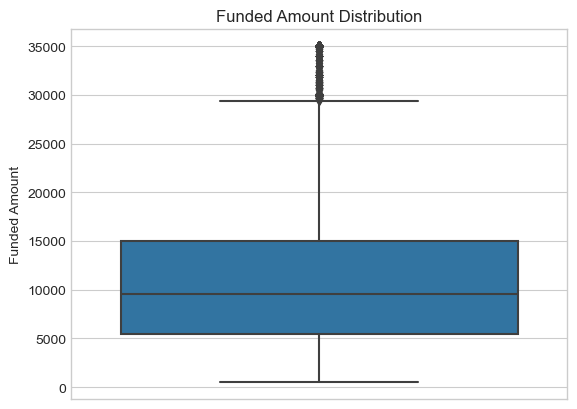

In [62]:
generateBoxplot(loan.funded_amnt, 'Funded Amount', 'Funded Amount Distribution')

As, we can visualize from above plot that there are outliers in our data and hence median is better representation of our data than mean. Hence we will use median of funded_amnt column i.e. 9600 for dividing data into bins. But as we want more bins so we will use half of it for creating bins i.e. 5000 approx (As it seems a better choice than 4800).

In the below code, we will create bins for our column and plot it against it's Default Rate.

In [63]:
# Deriving a new column with bins created for respective range
loan['funded_amnt_bin'] = pd.cut(
    loan['funded_amnt'], 
    [0,5000,10000,15000,20000,25000,30000,35000],
    labels=['0-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-30K','30K-35K']
)

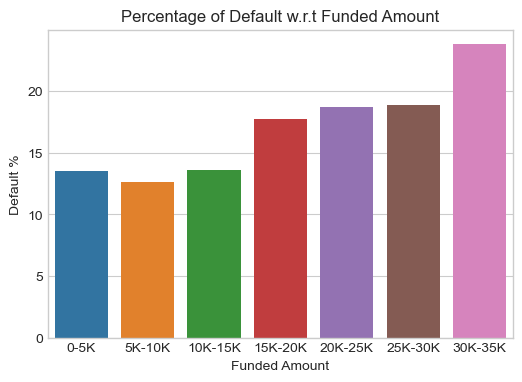

In [64]:
# Plotting it against Default Rate
generateBarplot(performUnivariateAnalysis('funded_amnt_bin'), 'Funded Amount', 'Percentage of Default w.r.t Funded Amount')

We can see that more the funded amount, more is the tendency to Default.


<mark>The reason for this is higher funding amount leads to high interest amount which becomes difficult for applicant to cover which results in higher default rate.</mark>

__2. Term Analysis__

Now, let's check the proportion of defaulters with respect to the _term_ of loan

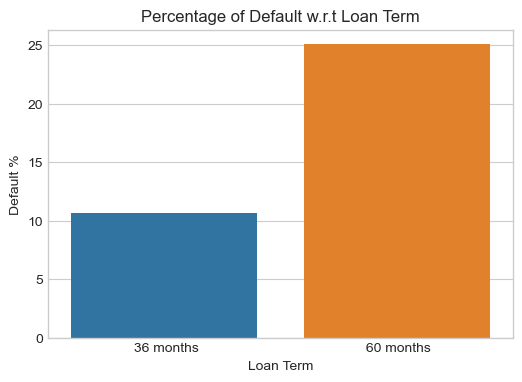

In [65]:
# Plotting proportion of defaulters w.r.t the term column
generateBarplot(performUnivariateAnalysis('term'), 'Loan Term', 'Percentage of Default w.r.t Loan Term')

We can see that loans with 60 months term tends to be defaulted more in comparison to loans taken for 36 months.


<mark>The reason for this can be that the applicants taking a loan for a longer term will have a higher interest amount and hence the chances of them defaulting on the loan is more.</mark>

__3. Interest Rate Analysis__

Comparing interest rate with default rate. 

As int_rate is having discrete values so we will create bins with some range.
In order to perform binning, first we will identify proper bin size or range. Hence we will describe the int_rate column to get it's summary statistics.

In [66]:
loan.int_rate.describe()

count    36743.000000
mean        11.975206
std          3.692557
min          5.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: int_rate, dtype: float64

Now, let's plot boxplot to visualize outliers.

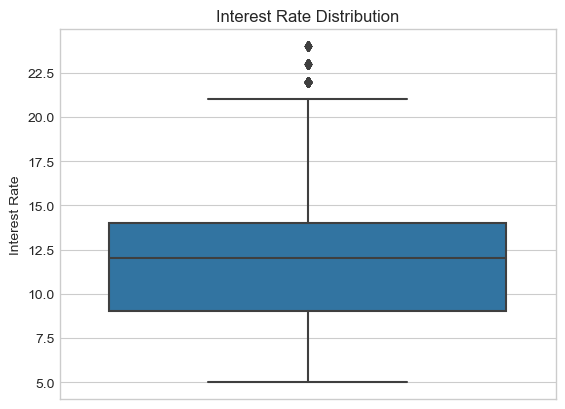

In [67]:
generateBoxplot(loan.int_rate, 'Interest Rate', 'Interest Rate Distribution')

As, we can visualize from above plot that there are outliers in our data and hence median is better representation of our data than mean. Hence we will use median of int_rate column i.e. 12 for dividing data into bins. But as we want more bins so we will use little bit more than half of it for creating bins i.e. 7 approx (As it seems a better choice than 6).

In the below code, we will create bins for our column and plot it against it's Default Rate.

In [68]:
# Deriving a new column with bins created for respective range
loan['int_rate_bin'] = pd.cut(
    loan['int_rate'], 
    [0,7,14,40],
    labels=['Low Interest','Moderate Interest','High Interest']
)

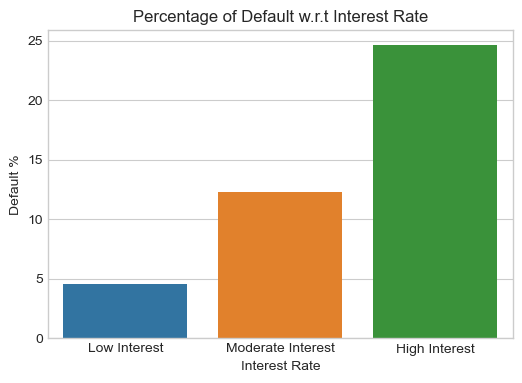

In [69]:
# Plotting it against Default Rate
generateBarplot(performUnivariateAnalysis('int_rate_bin'), 'Interest Rate', 'Percentage of Default w.r.t Interest Rate')

We can infer from the above plot that higher the interest for loan, more likely applicant will default on their loan.

<mark>The reason for this can be, loans with higher interest rate will have a higher interest amount and hence the chances of them defaulting on the loan is more</mark>

__4. Grade Analysis__

Let's check the proportion of defaulted loans with respect to _grade_ column.

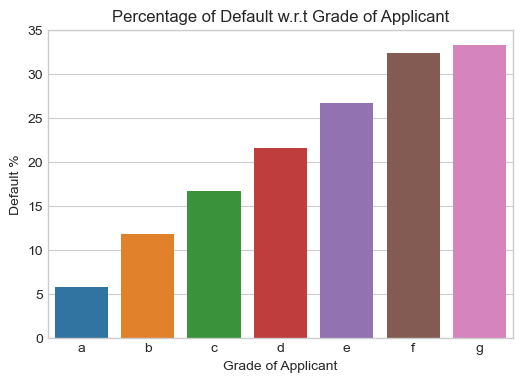

In [70]:
# Plotting proportion of defaulters w.r.t the grade column
generateBarplot(performUnivariateAnalysis('grade'), 'Grade of Applicant', 'Percentage of Default w.r.t Grade of Applicant')

We can infer from the above plot that lower the grade, more likely applicant will default on their loan.

<mark> As lower grade means that the applicant credit history is not good and hence he/she is more likely to default.</mark>

__5. Employement Length Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _emp_length_ column.

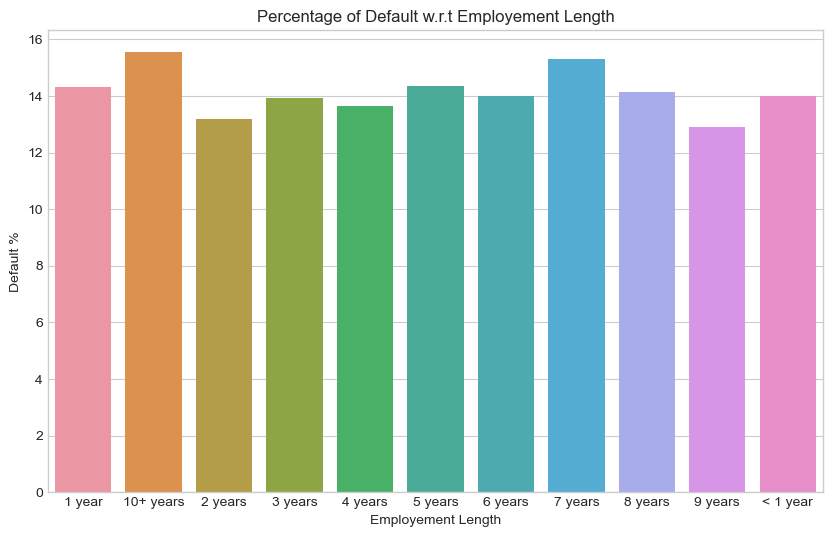

In [71]:
# Plotting proportion of defaulters w.r.t the emp_length column
generateBarplot(performUnivariateAnalysis('emp_length'), 'Employement Length',
                'Percentage of Default w.r.t Employement Length',(10,6))

<mark>We can see in the above plot that there's no recognizable pattern. So, we can say that probability of defaulting is not dependent on the employement length of the applicant. So, we will further analyse this column in bivariate analysis.</mark>

__6. Home Ownership Type Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _home_ownership_ column.

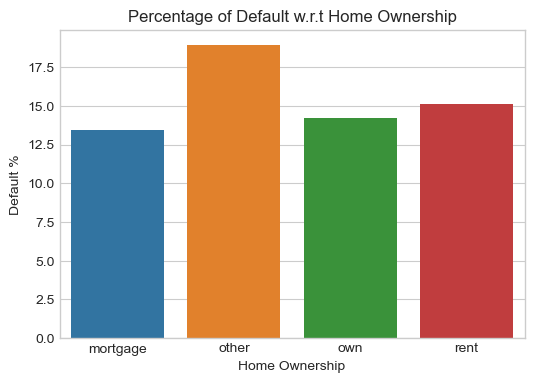

In [72]:
# Plotting proportion of defaulters w.r.t the emp_length column
generateBarplot(performUnivariateAnalysis('home_ownership'), 'Home Ownership','Percentage of Default w.r.t Home Ownership')

We can infer from the above plot that applicants with __other__ type of home ownership are most likely to default on their loans. If we ignore the __other__ type, we are unable to find a strong relationship between type of home ownership and default rate.

<mark> The reason behind this is that type of home ownership somewhat defines the economic status of the applicant. __Other__ type of home ownership can be a Joint Ownership or Community Property type etc. This type of ownership tells us that the applicant is likely not having a fixed place to stay which means their economic status is not that great. That is why, they are more likely to default.</mark>

__7. Annual Income Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _annual_inc_ column.

As annual_inc is a continuos variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for annual_inc column.

In [73]:
# Describing summary statitics for annual_inc per 1000 USD
loan.annual_inc.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])/1e03

count      36.743000
mean       69.408027
std        64.019908
min         4.000000
10%        30.000000
20%        38.000000
30%        45.000000
40%        51.000000
50%        60.000000
60%        66.000000
70%        76.000000
80%        90.000000
90%       116.651200
100%     6000.000000
max      6000.000000
Name: annual_inc, dtype: float64

Let's plot boxplot to visualize outliers and decide our bin size.

As there are outliers with very high value and if we will try to create box plot for all data of the annual income column then we won't be able to visualize the data as the box plot will be very highly compressed.

To resolve this issue, we filtered data to include amount below 500K only.
Here we will be able to visualize box plots with outliers easily.

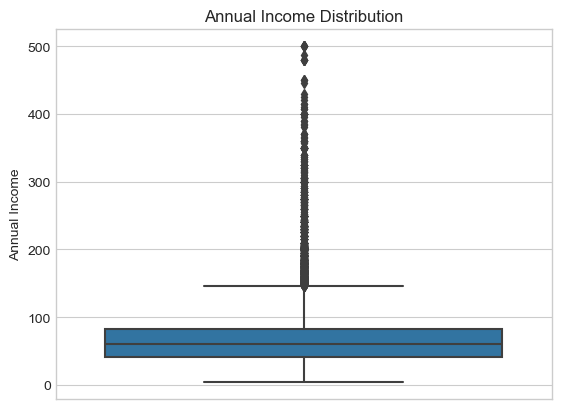

In [74]:
generateBoxplot(loan[loan.annual_inc<=500e03].annual_inc/1e03, 'Annual Income', 'Annual Income Distribution')

As there are many outliers in annual income, we won't be able to create bins of equal size. So, we will bin them to various categories as described below :
1. Very Low :  0K-30K 
2. Low : 30K-40K
3. Moderate : 40K-70K
4. High : 70K-120K
5. Very High : 120K+

In [75]:
# Deriving a new column with bins created for range defined above

loan['annual_inc_bin'] = pd.cut(
    loan['annual_inc'], 
    [0, 30e3, 40e3, 70e3, 120e3, 10e6],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

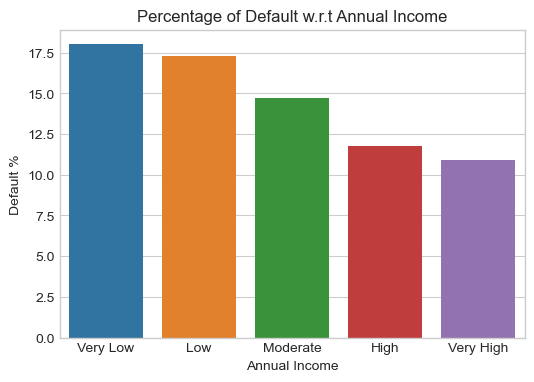

In [76]:
# Plotting proportion of defaulters w.r.t the annual_inc_bin column
generateBarplot(performUnivariateAnalysis('annual_inc_bin'), 'Annual Income','Percentage of Default w.r.t Annual Income')

We can infer from the above plot that applicants with __annual income lying in either low or very-low category__ are the one who are most like to default.

<mark> The reason behind this is that lower the income, it is less likely to cover up the loan for applicant as he/she might face some kind of financial issues. __So we can conclude that applicants having income less than $40,000 are the one who are more likely to default.__</mark>

__8. Verification Status Analysis__

Let's analyze the proportion of defaulted loans with respect to _verification_status_ column.

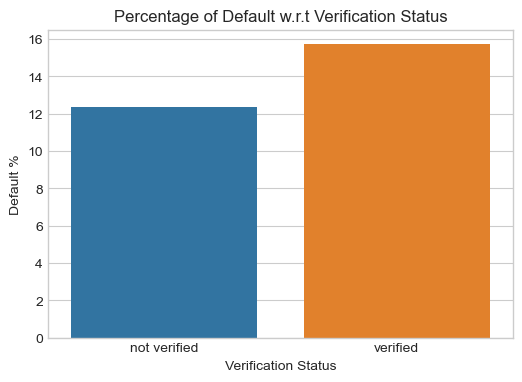

In [77]:
# Plotting proportion of defaulters w.r.t the verification_status column
generateBarplot(performUnivariateAnalysis('verification_status'), 'Verification Status',
                'Percentage of Default w.r.t Verification Status')

We can infer from the above plot that applicants with __verified__ source of income are more likely to default on their loan than the applicants without a verified source of income.

<mark>It is unexpected to see that the applicants with verified source of income are more likely to default. It needs to investigated further, we will investigate it later using __Bivariate Analysis__.</mark>

__9. Loan Purpose Type Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _purpose_ column.

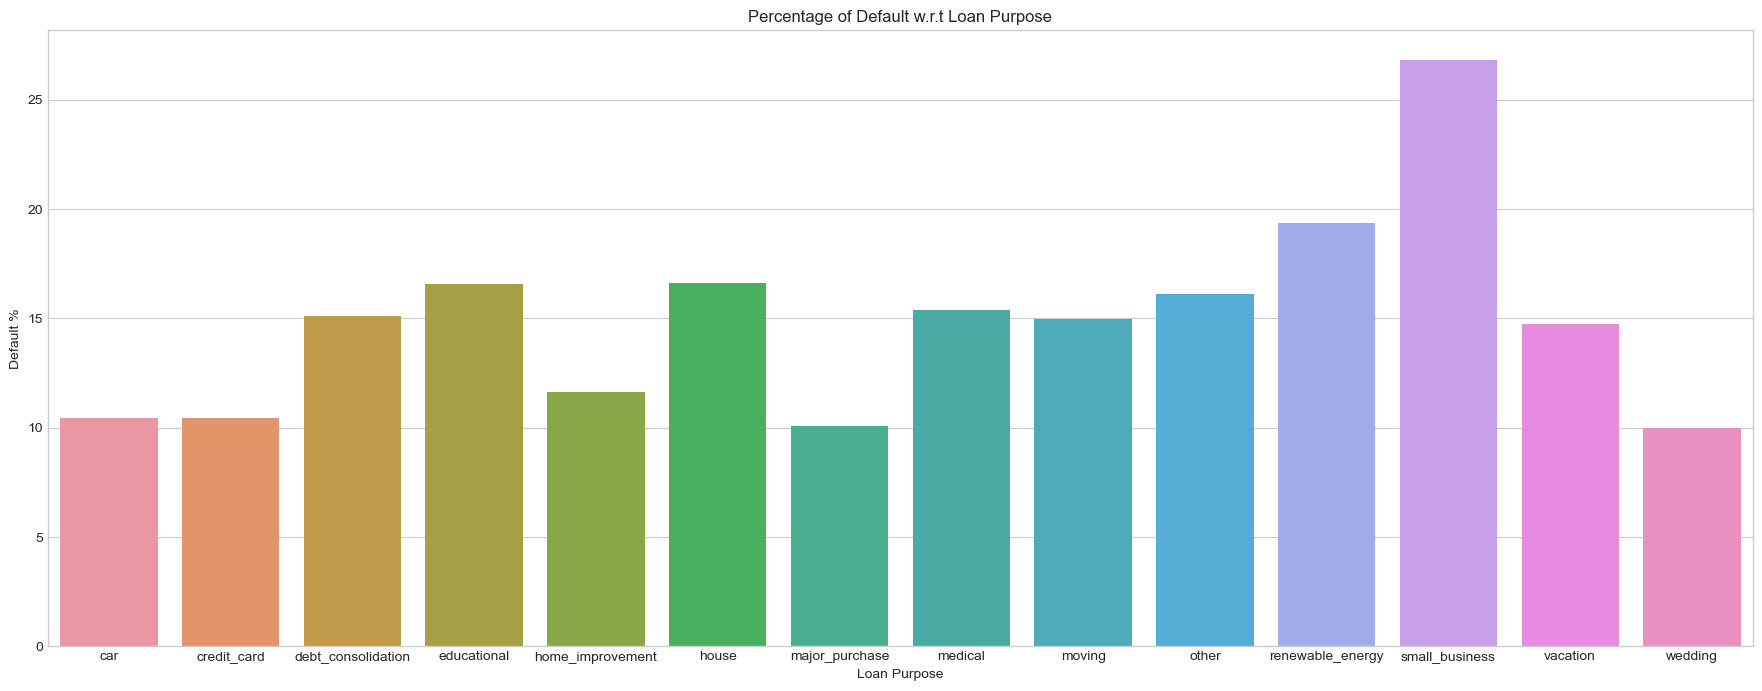

In [78]:
# Plotting proportion of defaulters w.r.t the purpose column
generateBarplot(performUnivariateAnalysis('purpose'), 'Loan Purpose','Percentage of Default w.r.t Loan Purpose',(22,8))

We can see from the above plot that loans with __small business__ as purpose is most likely to be defaulted. Also, loans with purposes like car, wedding or major purchase are relatively less likely to be defaulted.

<mark>The reason for this can be that __small businesses are generally risky__, so there are many cases in which small businesses become unprofitable. That's why loans for that purpose are most likely to default because of their risky nature. Also, loans for purposes like __Car, Major Purchase or Wedding__ are less risky because the loan repayment is pre-planned in these cases.</mark>

__10. State of Residence Analysis__

We will now analyze the proportion of defaults with respect to _addr_state_ column.

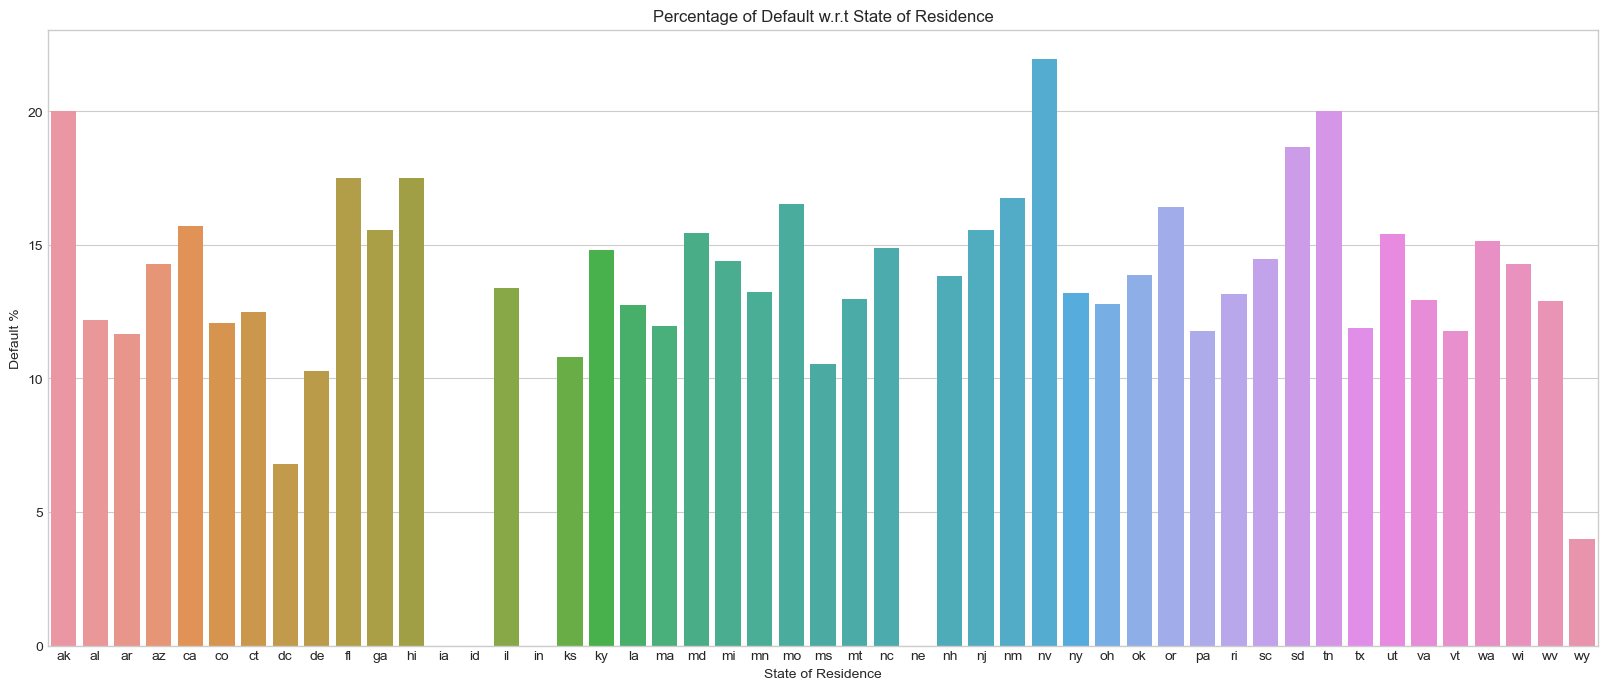

In [79]:
# Plotting proportion of defaulters w.r.t the addr_state column
generateBarplot(performUnivariateAnalysis('addr_state'), 'State of Residence',
                'Percentage of Default w.r.t State of Residence',(20,8))

<mark>We can infer, applicants belonging to State __NV(Nevada), TN(Tenessee) and AK(Alaska) are most likely to default.__ And people belonging to __IA(Iowa), ID(Idaho), NE(Nebraska) and IN(Indiana) almost never defaults__ on their loan. </mark>

__11. Debt To Income Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _dti_ column.

As dti is a continuos variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for dti column.

In [80]:
# Describing summary statitics for dti
loan.dti.describe()

count    36743.000000
mean        13.333536
std          6.650013
min          0.000000
25%          8.210000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

Let's plot boxplot to visualize outliers and decide our bin size.

As there are no outliers in this column as mean and median are similar. So we will decide bin size as below : 
1. Very Low :  0-6 
2. Low : 6-12
3. Moderate : 12-18
4. High : 18-24
5. Very High : 24+

In [81]:
# Deriving a new column with bins created for range defined above

loan['dti_bin'] = pd.cut(
    loan['dti'], 
    [0, 6, 12, 18, 24, 100],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

# Dropping the dti column as it is no longer required
loan.drop('dti', axis=1, inplace=True)

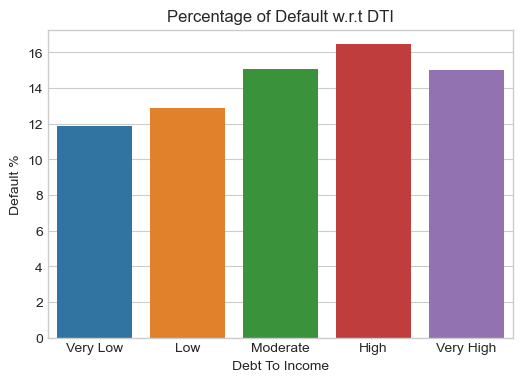

In [82]:
# Plotting proportion of defaulters w.r.t the dti_bin column
generateBarplot(performUnivariateAnalysis('dti_bin'), 'Debt To Income','Percentage of Default w.r.t DTI')

We can infer from above plot that as DTI increases, chances of default also increases.

<mark>The reason for this is DTI stands for Debt To Income Ratio. __If DTI is high, financial condition of person is poor and hence he/she is more likely to default.__</mark>

__12. Analysis of Delinquencies in Last 2 Years__

Let's analyze the proportion of defaults with respect to _delinq_2yrs_ column.

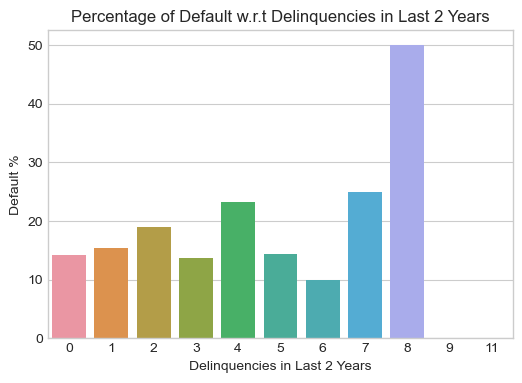

In [83]:
# Plotting proportion of defaulters w.r.t the delinq_2yrs column
generateBarplot(performUnivariateAnalysis('delinq_2yrs'), 'Delinquencies in Last 2 Years',
                'Percentage of Default w.r.t Delinquencies in Last 2 Years')

We can infer from the above plot that applicants with __8 delinquencies__ are highly likely to default i.e. 50%.

<mark>Applicants with high number of delinquency are possibly having poor economic status and hence they are failing to pay their debts. Though, with this inference we cannot surely say that people with higher number of delinquencies are more likely to default, as we can see that people with 9 and 11 delinquencies are not defaulting at all. __This needs to be further investigated later using bivariate analysis.__</mark>

__13. Loan Defaulter Analysis w.r.t the years when the loan was funded__

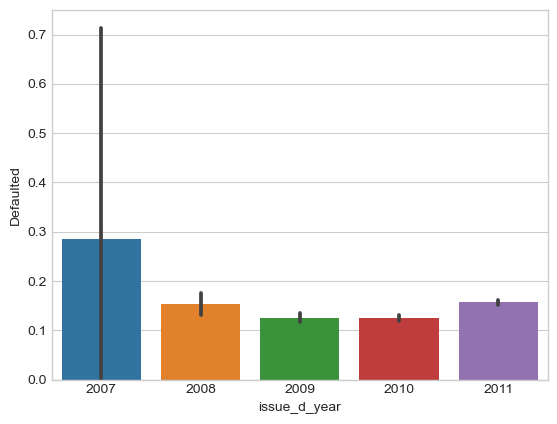

In [84]:
# Plotting proportion of defaulters w.r.t the issue_d column
sns.barplot(x='issue_d_year', y='Defaulted', data=loan)
plt.show()
#generateBarplot(performUnivariateAnalysis('issue_d_year'), 'Year when the loan was funded',
                #'Percentage of Default w.r.t Year when the loan was funded')

Although the frequency of the Defaulter was very high in the year 2007 had decreased on the futher years.

<mark>__We cannot infer anything useful from above plot. We can further investigate this column during bivariate analysis.__</mark>

__14. Analysis w.r.t Deafulters count against Interest Rate__

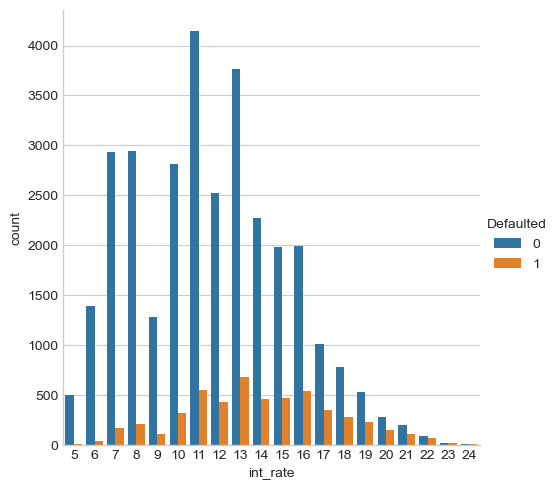

In [85]:
sns.catplot(x='int_rate', hue="Defaulted", data=loan, kind = "count") 
plt.show()

Obervations from the catplot 
The median for a defaulter and a non-defaulter are not stikingly diffrent
The population density of a non-defaulter and a defaulter doesn't change greatly wrt to interest rate
Although the population density is low at a very higher interest rate, the ratio between a defaulter and a non-defaulter increases greatly

__15. Analysis w.r.t Number of Inquiries In Last 6 Months__

Let's analyze the proportion of defaults with respect to _inq_last_6mths_ column.

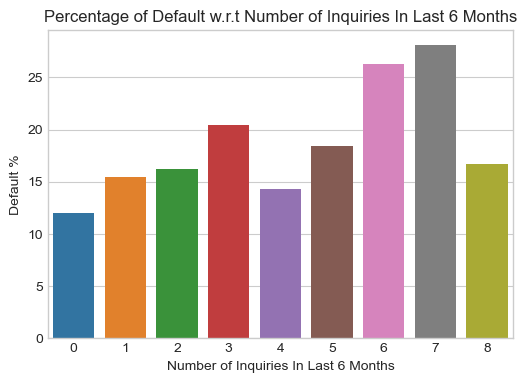

In [86]:
# Plotting proportion of defaulters w.r.t the inq_last_6mths column
generateBarplot(performUnivariateAnalysis('inq_last_6mths'), 'Number of Inquiries In Last 6 Months',
                'Percentage of Default w.r.t Number of Inquiries In Last 6 Months')

We can infer from the above plot that applicants with higher number of inquiries are little bit more likely to default but it's not the case where number of inquiries is 8.

<mark>__From above analysis we cannot infer any proper relationship with Default Rate. Hence, we will not consider this column anymore and hence we will discard it from our analysis.__</mark>

__16. Open Credit Lines Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _open_acc_ column.

As open_acc is a numerical variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for open_acc column.

In [87]:
# Describing summary statitics for open_acc
loan.open_acc.describe()

count    36743.000000
mean         9.299703
std          4.374847
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

As there are outliers in data. We will try to create box plot for all data of the open credit lines column.

Let's plot boxplot to visualize outliers and decide our bin size.

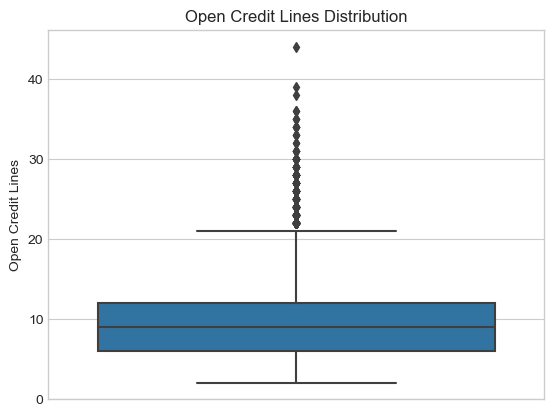

In [88]:
generateBoxplot(loan.open_acc, 'Open Credit Lines', 'Open Credit Lines Distribution')

As there are many outliers in Open Credit Lines, we won't be able to create bins of equal size. So, we will bin them to various categories as described below :
1. Very Low :  0-4 
2. Low : 4-7
3. Moderate : 7-10
4. High : 10-14
5. Very High : 14+

In [89]:
# Deriving a new column with bins created for range defined above

loan['open_acc_bin'] = pd.cut(
    loan['open_acc'], 
    [0, 4, 7, 10, 14, 100],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

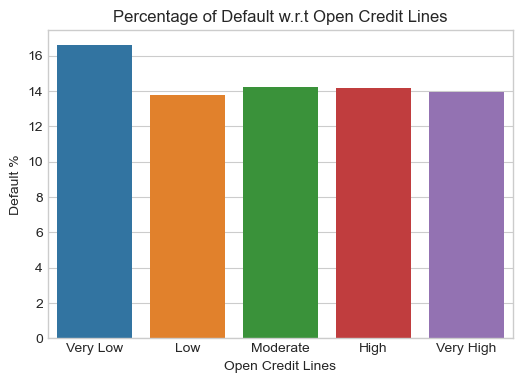

In [90]:
# Plotting proportion of defaulters w.r.t the open_acc_bin column
generateBarplot(performUnivariateAnalysis('open_acc_bin'), 'Open Credit Lines','Percentage of Default w.r.t Open Credit Lines')

<mark>__We cannot infer anything useful from above plot. We can further investigate this column during bivariate analysis.__</mark>

__17. Revolving Balance Utilization Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _revol_util_ column.

As revol_util is a numerical variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for revol_util column.

In [91]:
# Describing summary statitics for revol_util
loan.revol_util.describe()

count    36743.000000
mean        48.996339
std         28.311808
min          0.000000
25%         25.600000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

As there are no outliers in Revolving Balance Utilization, we will be able to create bins of equal size. So, we will bin them to various categories as described below :
1. Very Low :  0-20 
2. Low : 20-40
3. Moderate : 40-60
4. High : 60-80
5. Very High : 80-100

In [92]:
# Deriving a new column with bins created for range defined above

loan['revol_util_bin'] = pd.cut(
    loan['revol_util'], 
    [0, 20, 40, 60, 80, 100],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

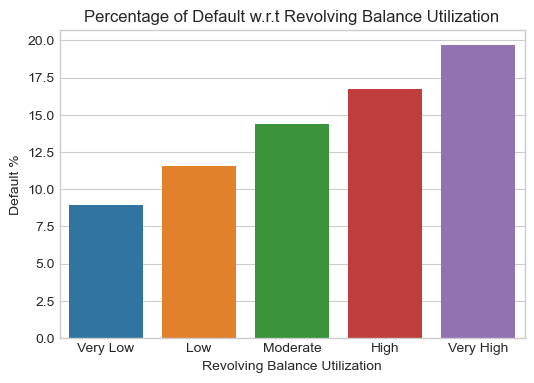

In [93]:
# Plotting proportion of defaulters w.r.t the revol_util_bin column
generateBarplot(performUnivariateAnalysis('revol_util_bin'), 'Revolving Balance Utilization',
                'Percentage of Default w.r.t Revolving Balance Utilization')

We can see that more the Revolving Balance Utilization, more is the tendency to Default.


<mark>The reason for this is higher Revolving Balance Utilization means person has no money to spend that's why he/she is more likely using credit card balance and is more reliant on credits/revolving balance which in turn results in Default as it's a very risky approach to be completely depend upon credit balance. This is one very important factor.</mark>

__18. Total Credit Lines Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _total_acc_ column.

As total_acc is a numerical variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for total_acc column.

In [94]:
# Describing summary statitics for total_acc
loan.total_acc.describe()

count    36743.000000
mean        22.144055
std         11.405812
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

As there are outliers in data. We will try to create box plot for all data of the total credit lines column.

Let's plot boxplot to visualize outliers and decide our bin size.

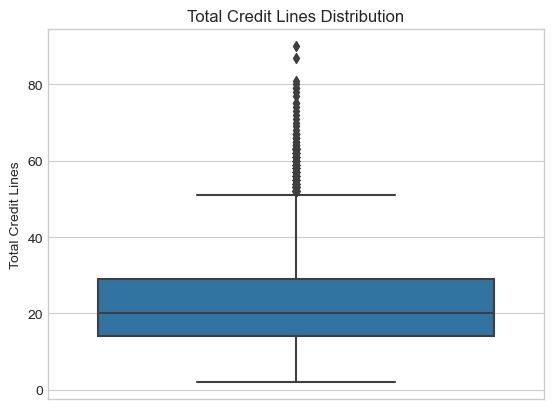

In [95]:
generateBoxplot(loan.total_acc, 'Total Credit Lines', 'Total Credit Lines Distribution')

As there are many outliers in Total Credit Lines, we won't be able to create bins of equal size. So, we will bin them to various categories as described below :
1. Very Low :  0-8
2. Low : 8-16
3. Moderate : 16-24
4. High : 24-32
5. Very High : 32+

In [96]:
# Deriving a new column with bins created for range defined above

loan['total_acc_bin'] = pd.cut(
    loan['total_acc'], 
    [0, 8, 16, 24, 32, 100],
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)

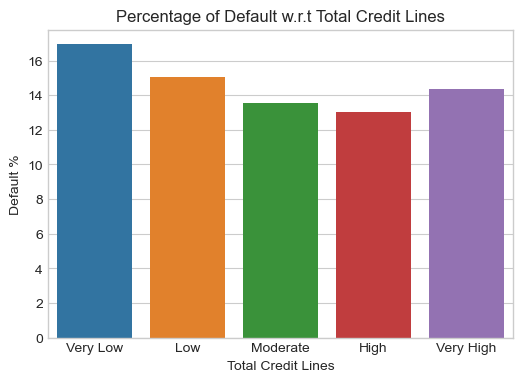

In [97]:
# Plotting proportion of defaulters w.r.t the total_acc_bin column
generateBarplot(performUnivariateAnalysis('total_acc_bin'), 'Total Credit Lines',
                'Percentage of Default w.r.t Total Credit Lines')

<mark>__We cannot infer anything useful from above plot. We can further investigate this column during bivariate analysis.__</mark>

__19. Analysis of Number of Public Record Bankruptcies__

Let's analyze the proportion of defaulted loans with respect to _pub_rec_bankruptcies_ column.

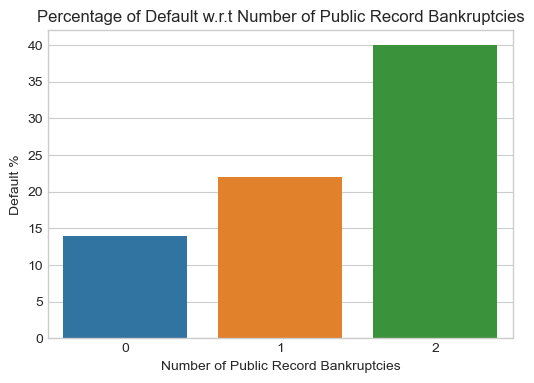

In [98]:
# Plotting proportion of defaulters w.r.t the pub_rec_bankruptcies column
generateBarplot(performUnivariateAnalysis('pub_rec_bankruptcies'), 'Number of Public Record Bankruptcies',
                'Percentage of Default w.r.t Number of Public Record Bankruptcies')

We can infer from the above plot that applicants with high number of bankruptcies tend to default on their loans. Applicants with higher number of publicly recorded bankruptcies have very high default rate i.e in the range of 20-40%.

<mark>__The reason for this is that the applicants who have already been bankrupt are in very poor financial conditions even after recovering from bankruptcy which increases their chances of defaulting on any type of loan. Hence, this column is very crucial for our analysis.__</mark>

__20. Age of Credit History Analysis__

Now, we will analyze the proportion of defaulted loans with respect to _age_cr_ column.

As age_cr is a numerical variable. We would need to understand it's distribution and create bins based on that.<br>
Let's describe the summary statistics for age_cr column.

In [99]:
# Describing summary statitics for age_cr
loan.age_cr.describe()

count    36743.000000
mean        13.537926
std          6.512134
min          3.000000
25%          9.000000
50%         12.000000
75%         17.000000
max         42.000000
Name: age_cr, dtype: float64

As there are outliers in data because there is huge difference between 75th percentile and max value. We will try to create box plot for all data of the total credit lines column.

Let's plot boxplot to visualize outliers and decide our bin size.

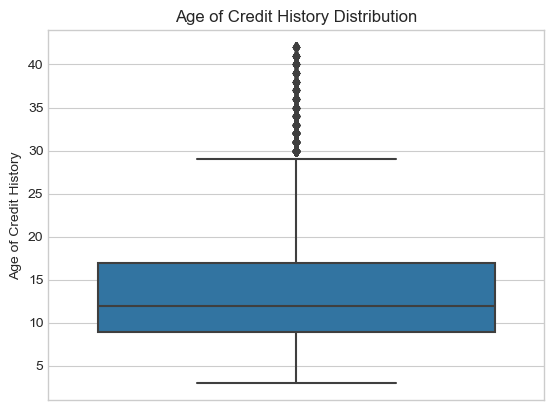

In [100]:
generateBoxplot(loan.age_cr, 'Age of Credit History', 'Age of Credit History Distribution')

As there are many outliers in Age of Credit History, we won't be able to create bins of equal size. Hence, we will bin them to various categories as described below :
1. Low : 0-10
2. Moderate : 10-20
3. High : 20+

In [101]:
# Deriving a new column with bins created for range defined above

loan['age_cr_bin'] = pd.cut(
    loan['age_cr'], 
    [0, 10, 20, 100],
    labels=['Low', 'Moderate', 'High']
)

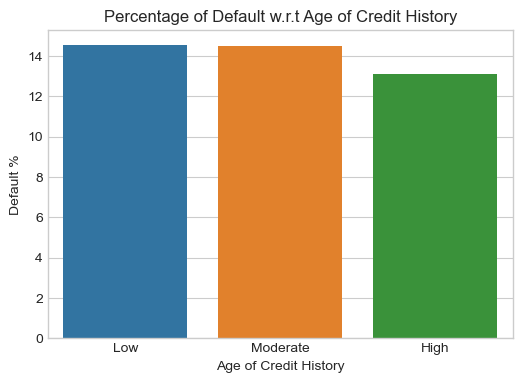

In [102]:
# Plotting proportion of defaulters w.r.t the age_cr_bin column
generateBarplot(performUnivariateAnalysis('age_cr_bin'), 'Age of Credit History',
                'Percentage of Default w.r.t Age of Credit History')

<mark>__We cannot infer anything useful from above plot. We can further investigate this column during bivariate analysis.__</mark>

__21. Analysis of Holiday Season__

Let's analyze the proportion of defaulted loans with respect to _holiday_season_ column.

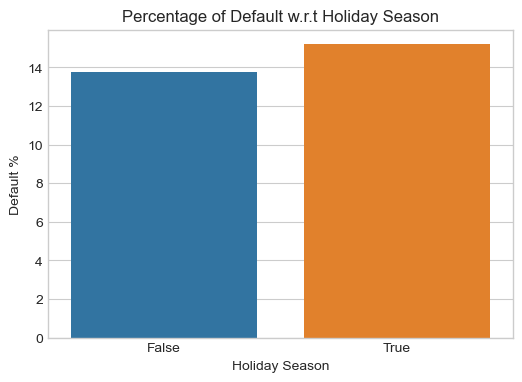

In [103]:
# Plotting proportion of defaulters w.r.t the holiday_season column
generateBarplot(performUnivariateAnalysis('holiday_season'), 'Holiday Season',
                'Percentage of Default w.r.t Holiday Season')

<mark>__We cannot infer anything useful from above plot. We can further investigate this column during bivariate analysis.__</mark>

#### Below are the highlights of our inferences from Univariate Analysis : 
1.  <span style="color:green">__Higher Loan amount__ leads to higher default rate.</span>

2.  <span style="color:green">Loans for a __longer term__ will have higher chances of defaulting.</span>

3. <span style="color:green">Loans with __high interest rate__ will have higher chances of defaulting.</span>

4. <span style="color:green">__Lower grade__ means that the applicant is more likely to default.</span>

5. <span style="color:red">Probability of defaulting is not dependent on the __employement length__ . We will discard this column from further analysis.</span>

6. <span style="color:green">__Home Ownership__  as Others are more likely to default.</span>

7. <span style="color:green">__Lower the income__, more is the chances to default i.e applicant with income less than 40,000 USD.</span>

8. <span style="color:blue">It is unexpected that applicants with __verified source of income__ are more likely to default. We will need further analysis.</span>

9. <span style="color:green">__Small businesses__ are generally risky and are most likely to default.</span>

10. <span style="color:green">Applicants belonging to __State NV(Nevada), TN(Tenessee) and AK(Alaska)__ are most likely to default.</span>

11. <span style="color:green">Higher the __DTI__, higher the chances to default.</span>

12. <span style="color:blue">Applicants with __high number of delinquency__ are more likely to default but we cannot surely say this because we can see that people with 9 and 11 delinquencies are not defaulting at all. We will need further analysis.</span>

13. <span style="color:red">We cannot infer any proper relationship of __issue_d__ with Default Rate. We will  discard this column from further analysis.</span>

14. <span style="color:green">Loans with __high interest rate__ will have higher chances of defaulting.</span>

15. <span style="color:red">We cannot infer any proper relationship of __Number of inquiries__ with Default Rate. We will  discard this column from further analysis.</span>

16. <span style="color:red">We cannot infer any proper relationship of __Open Credit Lines__ with Default Rate. We will  discard this column from further analysis.</span>

17. <span style="color:green">Higher the __Revolving Balance Utilization__ , higher the chances to Default.</span>

18. <span style="color:red">We cannot infer any proper relationship of __Total Credit Lines__ with Default Rate. We will  discard this column from further analysis.</span>

19. <span style="color:green">Applicants who have already been __bankrupt__ are in very poor financial conditions and are more likely to Default. This column is very crucial for our analysis.</span>

20. <span style="color:red">We cannot infer any proper relationship of __Age of Credit History__ with Default Rate. We will  discard this column from further analysis.</span>

21. <span style="color:red">We cannot infer any proper relationship of __Holiday Season__ with Default Rate. We will discard this column from further analysis.</span>

## II. Bivariate Analysis
In bivariate analysis, we will analyse more than one variable (column) at a time.

Now we will find correlation between all the numerical variables except columns which are categorical in nature but of numerical datatypes.

<Axes: >

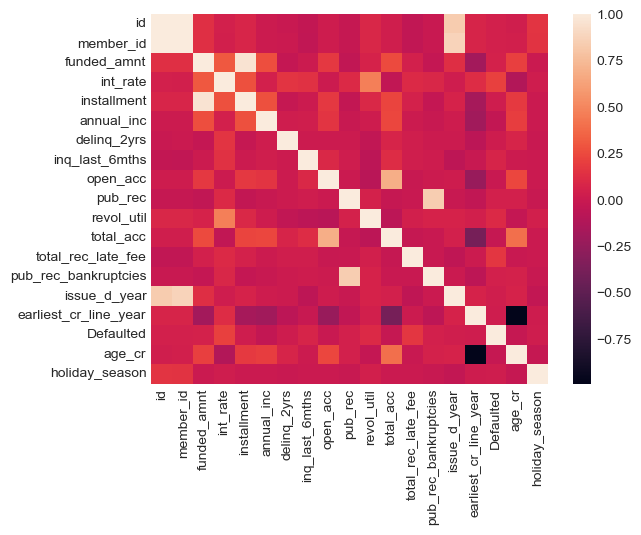

In [104]:
# Finding Correlation between all the columns
# Generating HeatMap
sns.heatmap(loan.corr())

Among all the variables the interest rate tend to affect the probability of defaulter the most. 

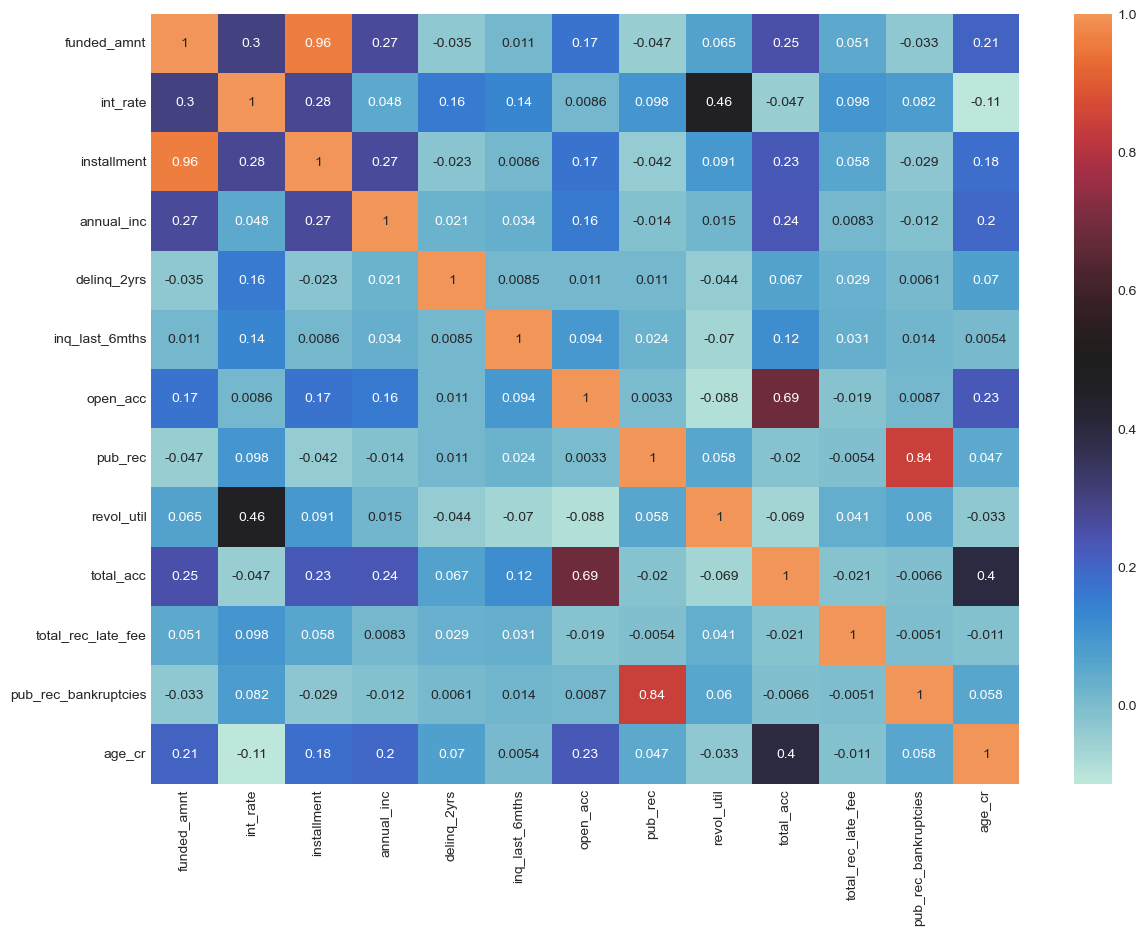

In [105]:
# Fetching all numerical columns except those of categorical nature
numericalColumnsDF = loan.select_dtypes( 
    include = ['int32','int64','float64']
).drop(['Defaulted','id','member_id','issue_d_year','earliest_cr_line_year'],axis=1)

# Finding Correlation between numerical columns
correlation = numericalColumnsDF.corr()

# Generating HeatMap
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=True, center=0.5)
plt.show()

From the above heatmap we can find the following highly correlated pairs of numerical columns : 
1. Funded Amount and Installment (0.96)
2. Interest Rate and Revolving Balance Utilization (0.46)
3. Open Credit Lines and Total Credit Lines (0.69)
4. Public Derogatory Records and Public Record Bankruptcies (0.84)
5. Total Credit Lines and Age of Credit History (0.40)

__Printing Sample Dataset__

In [106]:
loan.sample(5)

,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_rec_late_fee,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Defaulted,age_cr,holiday_season,funded_amnt_bin,int_rate_bin,annual_inc_bin,dti_bin,open_acc_bin,revol_util_bin,total_acc_bin,age_cr_bin
38105,364645,375331,1400,36 months,11,45.73,b,b3,< 1 year,rent,10000.0,not verified,"Nov, 2008",credit_card,189,pa,0,"Dec, 1998",0,12,0,47.5,12,0.0,0,Nov,2008,Dec,1998,0,10,True,0-5K,Moderate Interest,Very Low,High,High,Moderate,Low,Low
35237,383762,414262,6700,36 months,12,222.00,b,b3,9 years,mortgage,75744.0,not verified,"Sep, 2009",credit_card,087,nj,0,"Apr, 1998",3,8,0,72.1,22,0.0,0,Sep,2009,Apr,1998,0,11,False,5K-10K,Moderate Interest,High,Moderate,Moderate,High,Moderate,Moderate
29110,527052,681761,3000,36 months,14,102.51,c,c3,7 years,rent,14400.0,not verified,"Jun, 2010",debt_consolidation,300,ga,0,"Aug, 2006",0,4,0,70.8,4,0.0,0,Jun,2010,Aug,2006,0,4,True,0-5K,Moderate Interest,Very Low,Moderate,Very Low,High,Very Low,Low
9561,847213,1044152,35000,36 months,14,1196.05,c,c3,4 years,mortgage,72400.0,verified,"Aug, 2011",small_business,997,ak,0,"Dec, 2002",1,11,0,41.9,32,59.8,0,Aug,2011,Dec,2002,0,9,False,30K-35K,Moderate Interest,High,High,High,Moderate,High,Low
2763,1032016,1261447,23000,60 months,20,613.21,e,e5,10+ years,mortgage,120000.0,verified,"Dec, 2011",debt_consolidation,606,il,0,"Jun, 1997",2,14,0,52.9,41,0.0,0,Dec,2011,Jun,1997,0,14,True,20K-25K,High Interest,High,Low,High,Moderate,Very High,Moderate


Defining functions to generate Hue Bar Plot that will be useful in our bivariate analysis.

In [107]:
# Defining a function to generate Hue bar plots
def generateHueBarplotProportion(colX, colHue, label, title, legendTitle, size=(8,6), legendPos='best'):
    
    plt.figure(figsize=(size[0],size[1]))
   
    sns.barplot(data=loan, x=colX, y='Defaulted', hue=colHue, ci=None)
    
    plt.xlabel(label)
    plt.ylabel('Default Proportion')
    plt.legend(title = legendTitle, loc=legendPos, title_fontsize='x-large')
    plt.title(title)
    
    plt.show()

In [108]:
# Defining a function to generate bar plots
def generateHueBarplotCount(colX, label, title, df=loan, size=(8,6)):
    
    plt.figure(figsize=(size[0],size[1]))
   
    sns.barplot(data=df, x=colX, y='Defaulted', ci=None, estimator=np.size)
    
    plt.xlabel(label)
    plt.ylabel('Loan Count')
    plt.title(title)
    
    plt.show()

As we know from univariate analysis, __higher funded amount or higher term or higher interest rate__ leads to higher default rate and they are also related for calculating total loan amount. Hence, we will perform __Bivariate Analysis__ to get more insights.

#### 1. Default Rate By Funded Amount & Interest Rate

<Axes: xlabel='funded_amnt_bin', ylabel='int_rate'>

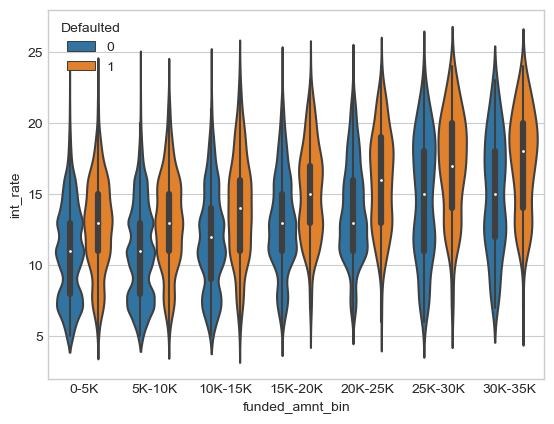

In [109]:
# Generating Violinplot 
sns.violinplot(data=loan, x="funded_amnt_bin", y="int_rate",hue="Defaulted")

The loan amount and the interest rate has a postive correlation.
The probablity of defaulter increases more with interest rate than the funded amount


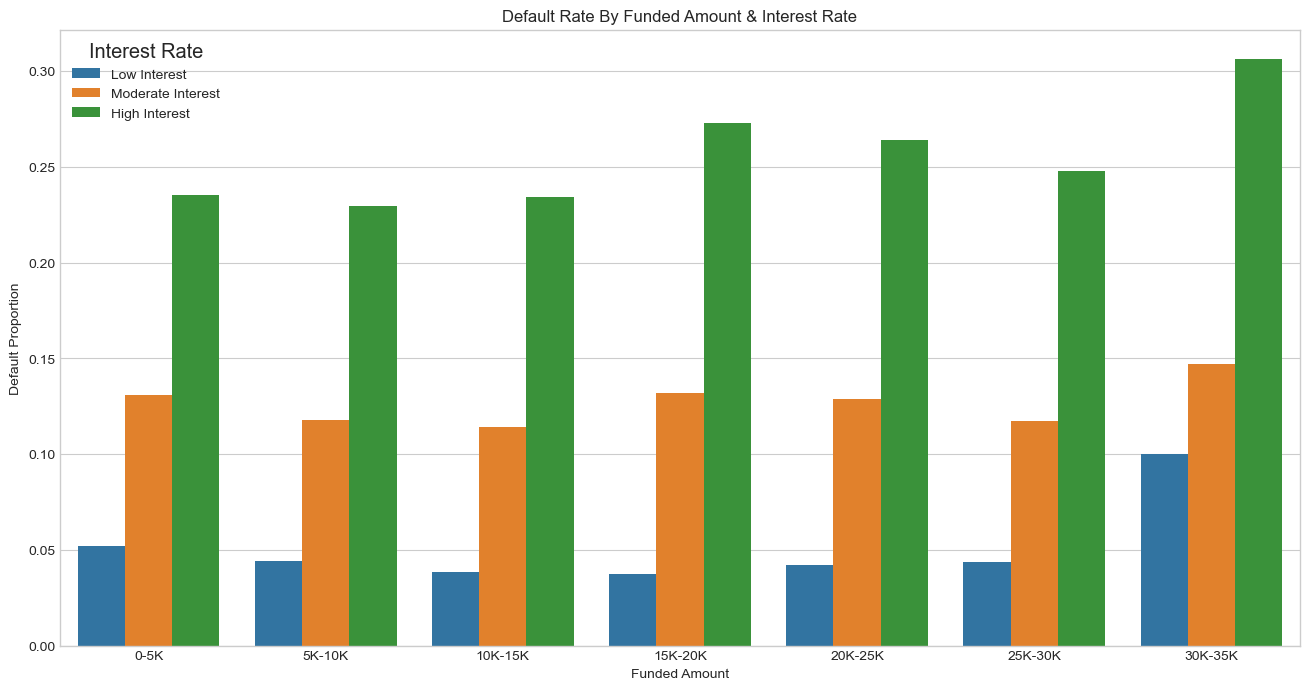

In [110]:
# Generating Hue barplot 
generateHueBarplotProportion('funded_amnt_bin', 'int_rate_bin', 'Funded Amount', 
                             'Default Rate By Funded Amount & Interest Rate', 'Interest Rate',(16,8))

__From the above plot, we can infer the following information :__
- Default rate is not significantly increasing with increase in funded amount for any of sub-groups. Hence this column is of __no significance__.
- For Interest Rate, we can see that  __Loans with High Interest Rate__ is most likely to default in every categories of funded amount.

<mark><span style="color:green">__From this plot, we cannot infer any useful combination for determining Default Rate.__</span></mark>

#### 2. Default Rate By Interest Rate & Term of Loan

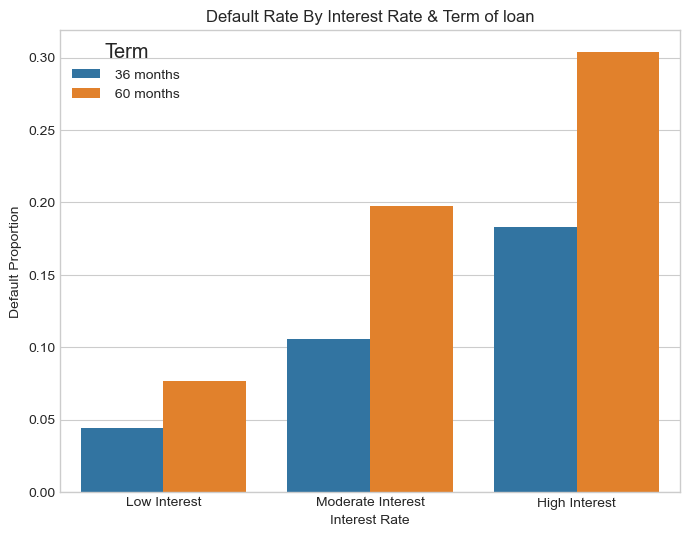

In [111]:
# Generating Hue barplot 
generateHueBarplotProportion('int_rate_bin', 'term', 'Interest Rate', 'Default Rate By Interest Rate & Term of loan', 'Term')

__From the above plot, we can infer the following information :__
- For Interest Rate, we can see that  __Loans with High Interest Rate__ is most likely to default in every categories of term.
- For term, we can see that applicants with __Longer term of Loan__ are having high default rate for all of the Interest Rate types.

<mark><span style="color:green">__Hence, combination of High Interest Rate with Longer Loan Term is an important combination for determining default rate.__</span></mark>

As we know from univariate analysis, __lower grade and higher number of bankruptcy__ means higher chances of default rate. They are also related as applicants who have already been bankrupt are more likely to have lower rating/grade. Hence, we will perform __Bivariate Analysis__ to get more insights.

#### 3. Default Rate By Grade & Number of Bankruptcy

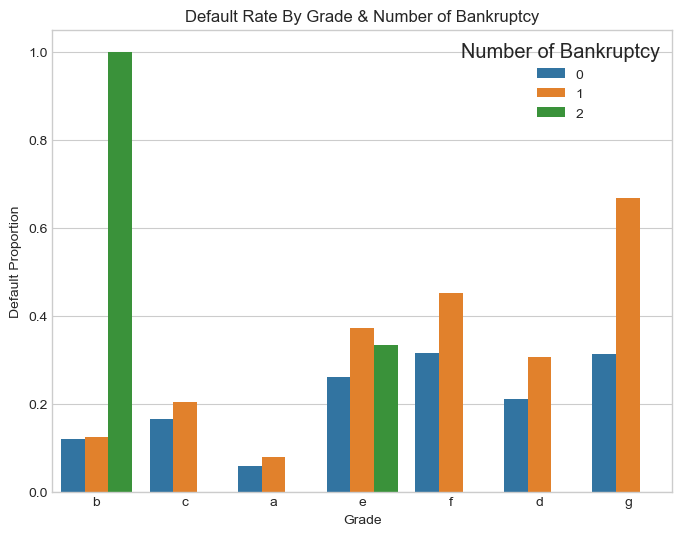

In [112]:
# Generating Hue barplot 
generateHueBarplotProportion('grade', 
                             'pub_rec_bankruptcies', 'Grade', 'Default Rate By Grade & Number of Bankruptcy',
                             'Number of Bankruptcy', (8,6), 'upper right')

Here, we can see the proportion of applicants with grade B and number of bankruptcy as 2 has default rate of 100% which seems little weird. So we will plot the count plot of same columns with data filtered to contain records where number of bankruptcy is 2 in order to check if there is only one or few applicants in that category which is resulting in 100% default rate.

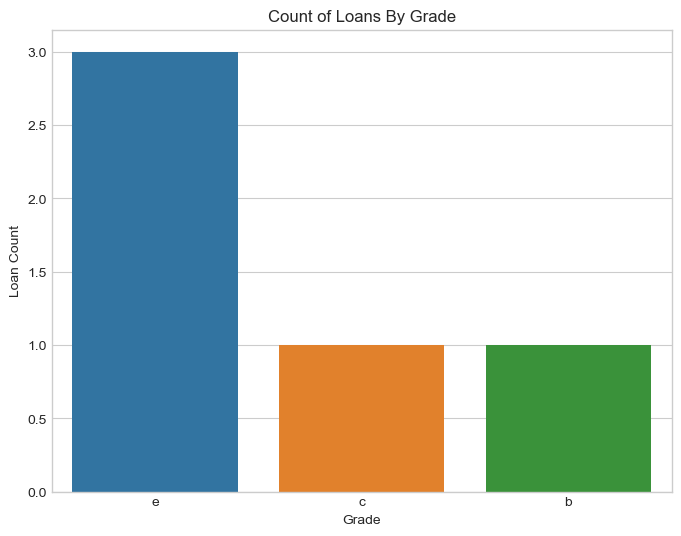

In [113]:
# Generating count plot with filtered data
generateHueBarplotCount('grade', 
                        'Grade', 'Count of Loans By Grade', 
                        loan[loan.pub_rec_bankruptcies==2])

Our doubt is verified here. Number of loans with applicant of grade 'B' is 1 and that person is defaulting which is resulting in 100% default Rate.

__From the above Default Rate plot, we can infer the following information :__
- For Grade, we can see that the __D,E,F,G__ grade types are most likely to default in every categories of Number of Bankruptcy.
- For Number of Bankruptcy, we can see that applicants with __bankruptcy__ are having high default rate for all of the grade types.

<mark><span style="color:green">__Hence, combination of Low grades i.e D,E,F,G with Bankruptcy i.e. 1+ is an important combination for determining default rate.__</span></mark>

As we know from univariate analysis, __home ownership as Others or lower annual income__ leads to higher default rate and they are also related for determining applicants economic status. Hence, we will perform __Bivariate Analysis__ to get more insights.

#### 4. Default Rate By Home Ownership & Annual Income

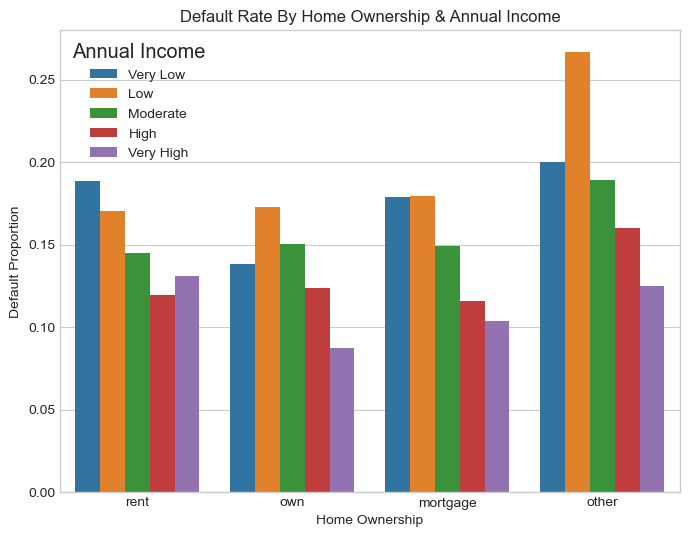

In [114]:
# Generating Hue barplot 
generateHueBarplotProportion('home_ownership', 'annual_inc_bin', 'Home Ownership', 
                             'Default Rate By Home Ownership & Annual Income', 'Annual Income')

__From the above plot, we can infer the following information :__
- For home ownership, we can see that the __Other__ ownership type is most likely to default in every categories of income.
- For Annual Income, we can see that applicants with __Low__ income are having high default rate for all of the home ownership types.

<mark><span style="color:green">__Hence, combination of home ownership type as Other and Low annual income is an important combination for determining default rate.__</span></mark>

We know from univariate analysis, __high Debt to Income Ratio (DTI) or high Revolving Balance Utilization__ leads to higher default rate and they are also related for determining applicants dependency on loans. Hence, we will perform __Bivariate Analysis__ to get more insights.

#### 5. Default Rate By Debt to Income Ratio (DTI) & Revolving Balance Utilization

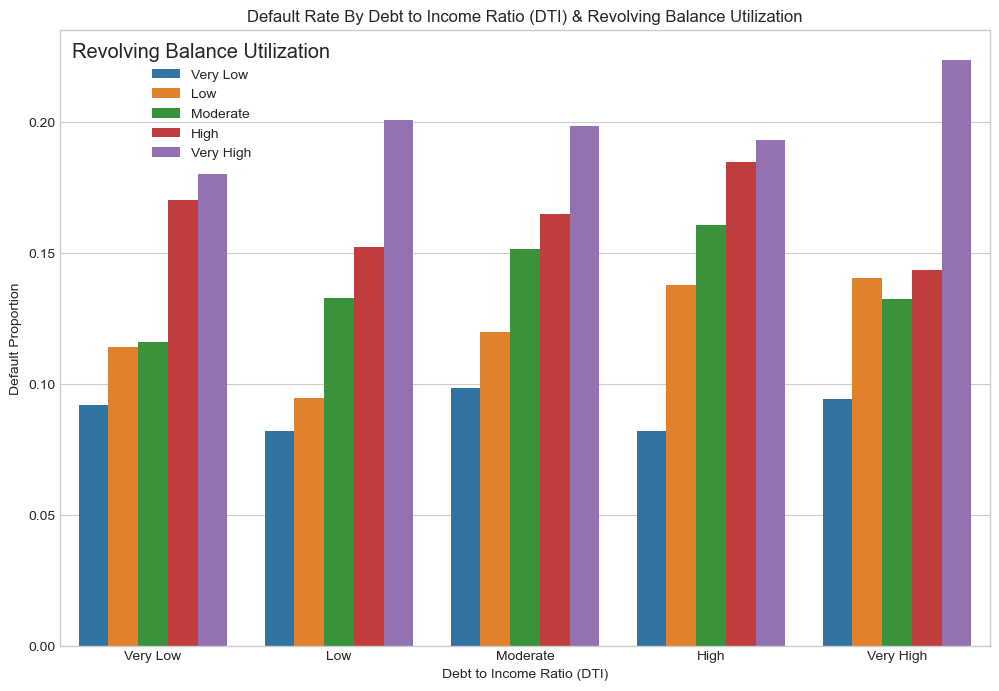

In [115]:
# Generating Hue barplot 
generateHueBarplotProportion('dti_bin', 'revol_util_bin', 'Debt to Income Ratio (DTI)', 
                             'Default Rate By Debt to Income Ratio (DTI) & Revolving Balance Utilization',
                             'Revolving Balance Utilization',(12,8))

__From the above plot, we can infer the following information :__
- Default rate is not significantly increasing with increase in Debt to Income Ratio for any of the sub-groups. Hence this column is of __no significance__.
- For Revolving Balance Utilization, we can see that applicants with __high revolving balance utilization__ are most likely to default in every categories of DTI Ratio.

<mark><span style="color:green">__From this plot, we cannot infer any useful combination for determining Default Rate.__</span></mark>

We know from univariate analysis, __small business as loan purpose or applicants with high DTI__ have higher default rate. Now, we will perform __Bivariate Analysis__ to get more insights.

#### 6. Default Rate By Revolving Balance Utilization & Loan Purpose

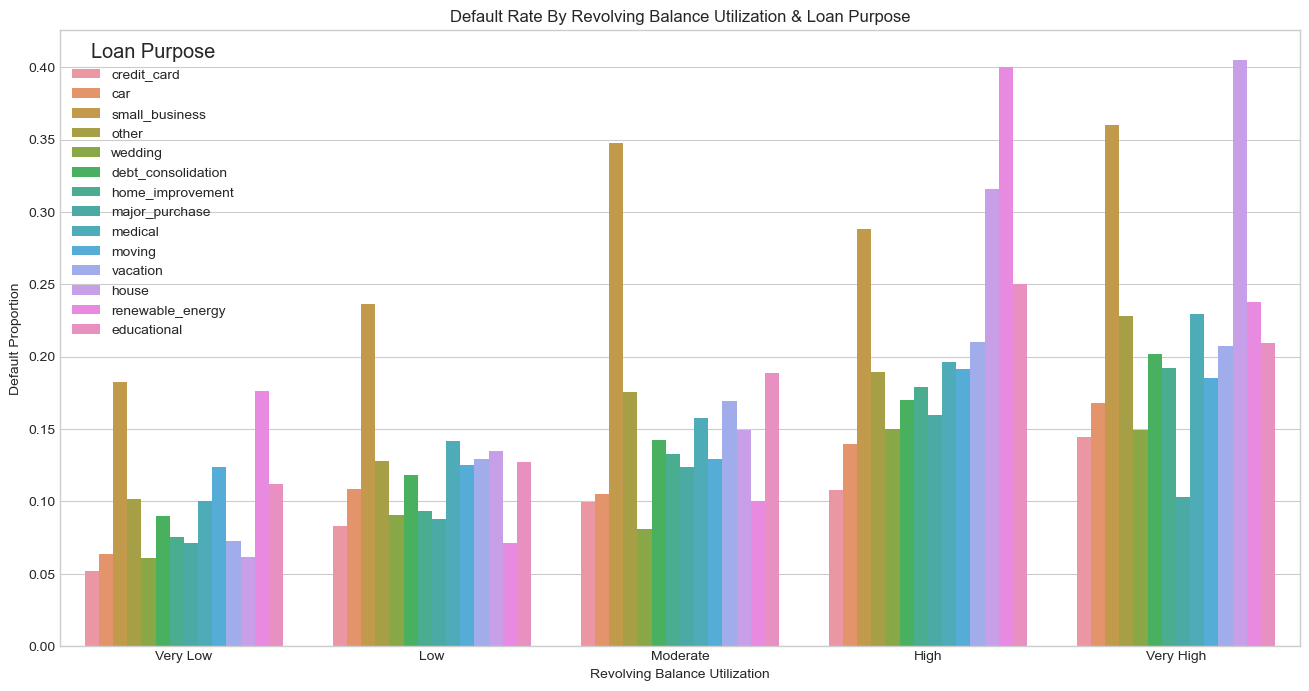

In [116]:
# Generating Hue barplot 
generateHueBarplotProportion('revol_util_bin', 'purpose', 'Revolving Balance Utilization', 
                             'Default Rate By Revolving Balance Utilization & Loan Purpose','Loan Purpose',(16,8))

__From the above plot, we can infer the following information :__
- For Revolving Balance Utilization, we can see that the __Very High__ revolving balance utilization is most likely to default in every categories of loan purpose.
- For Loan Purpose, we can see that applicants with __Small Business__ as loan purpose are having high default rate for all of the revolving balance utilization categories.

<mark><span style="color:green">__Hence, combination of Very High revolving balance utilization and Small Business as loan purpose is an important combination for determining default rate.__</span></mark>

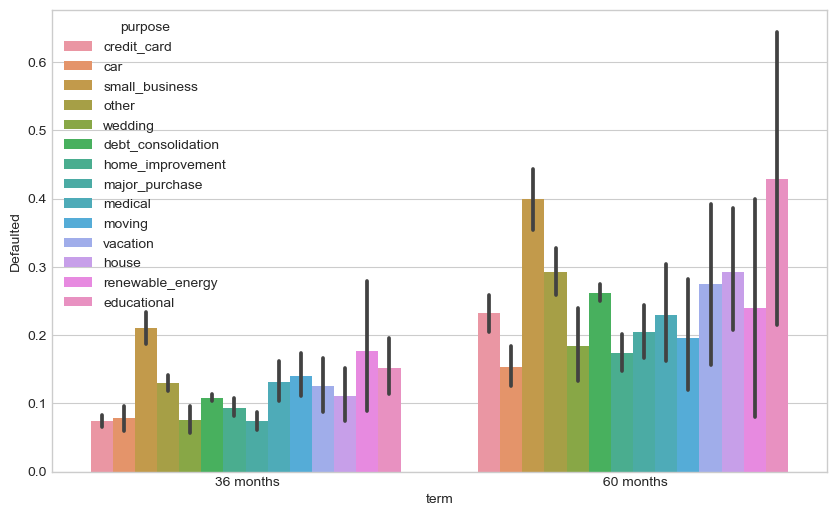

In [117]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="Defaulted", hue='purpose', data=loan)
plt.show()

In both the terms the lenders with the purpose of small-business, others, renewable_energy, and educaltional are more probable defaulters 

### Now, we will explore those columns in bivariate analysis from which we were not able to draw any inference during univariate and needed further analysis.

#### 1. Default Rate By Verification Status & Annual Income

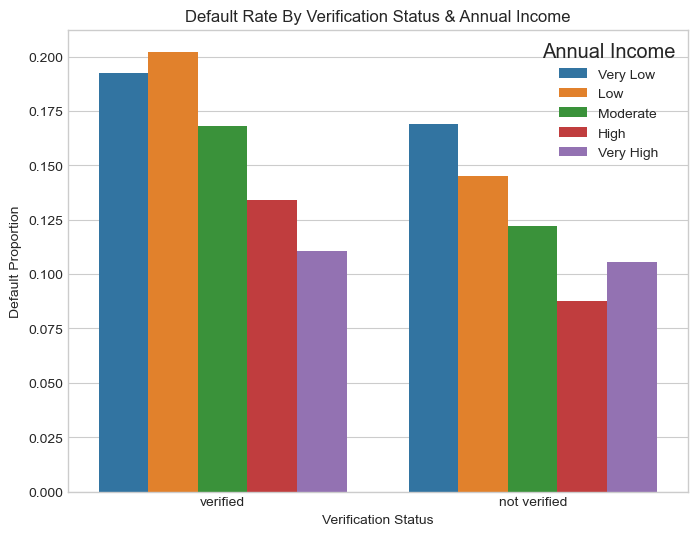

In [118]:
# Generating Hue barplot 
generateHueBarplotProportion('verification_status', 'annual_inc_bin', 'Verification Status', 
                             'Default Rate By Verification Status & Annual Income','Annual Income')

__From the above plot, we can infer the following information :__
- Default rate is not significantly variying with Verification Status for any of the sub-groups. Hence this column is of __no significance__.
- For Annual Income, we can see that applicants with __low income__ are most likely to default in every categories of Verification Status.

<mark><span style="color:green">__From this plot, we cannot infer any useful combination for determining Default Rate.__</span></mark>

#### 2. Default Rate By Delinquency in last 2 years & Number of Bankruptcy

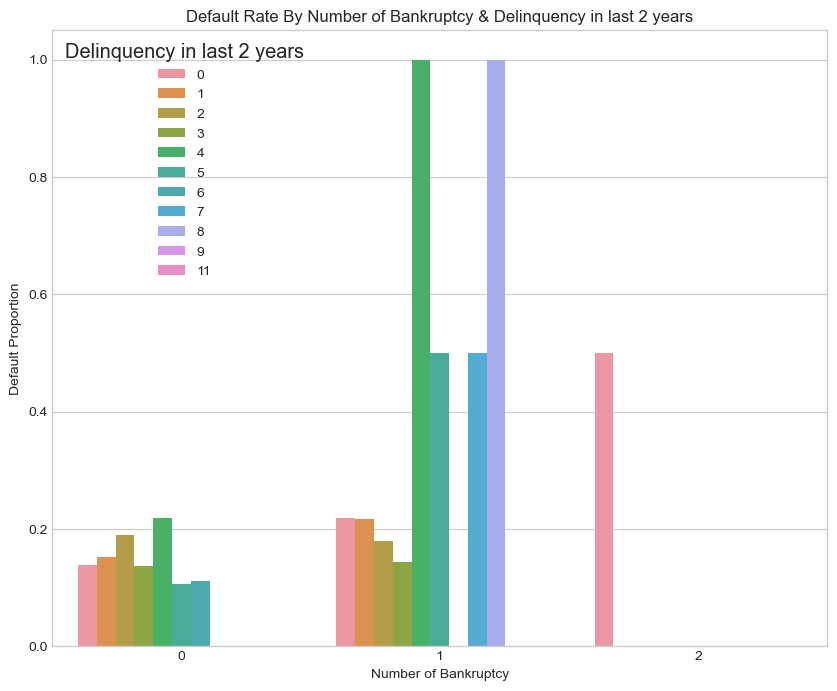

In [119]:
# Generating Hue barplot 
generateHueBarplotProportion('pub_rec_bankruptcies', 'delinq_2yrs', 'Number of Bankruptcy', 
                             'Default Rate By Number of Bankruptcy & Delinquency in last 2 years',
                             'Delinquency in last 2 years',(10,8))

We can see that for delinquency in last 2 years, we have zero default rate for values 9,11. We have doubt that this may be due to low number of sample in which there are no defauted applicants and hence resulting in 0% Default Rate. 

In order to verify our assumption, we will plot a count plot for number of delinquency is greater than 8.

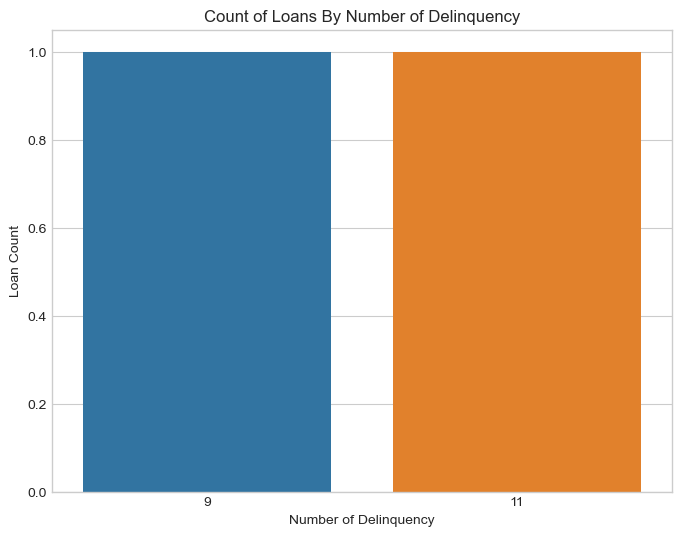

In [120]:
# Generating count plot with filtered data
generateHueBarplotCount('delinq_2yrs', 
                        'Number of Delinquency', 'Count of Loans By Number of Delinquency',
                        loan[loan.delinq_2yrs>8])

Our assumption is true i.e. number of loans taken by applicants with delinquency greater than 8 is 1 but they have not defaulted on their loan which results in Zero Default Rate.

__From the above plot, we can infer the following information :__
- For Bankruptcy, we can see that the __High__ number of bankruptcy leads to default in every categories of Delinquency in last 2 years.
- For Delinquency in last 2 years, we can see that applicants with __delinquencies greater than equal to 4__ are having high default rate for all of the bankrupt categories.

<mark><span style="color:green">__Hence, combination of delinquency above and equal to 4 with bankruptcy is an important combination for determining default rate.__</span></mark>

# Bivariate Summary

#### Below are the highlights of our inferences from Univariate Analysis : 
1.  <span style="color:green">__High Interest Rate with Longer Loan Term__ is an important combination for determining default rate.</span>

2.  <span style="color:green">__Low grades i.e D,E,F,G with Bankruptcy i.e. 1+__ is an important combination for determining default rate.</span>

3. <span style="color:green">__Home Ownership type as Other and Low annual income__ is an important combination for determining default rate.</span>

4. <span style="color:green">__Very High revoliving balance utilization and Small Business as loan purpose__ is an important combination for determining default rate.</span>

5. <span style="color:green">__Delinquency above and equal to 4 with bankruptcy__ is an important combination for determining default rate.</span>

# Univariate Summary - All Non-Discarded (i.e. green marked) Columns

#### Below are the highlights of our inferences from Univariate Analysis : 
1.  <span style="color:green">__Higher Loan amount__ leads to higher default rate.</span>

2.  <span style="color:green">Loans for a __longer term__ will have higher chances of defaulting.</span>

3. <span style="color:green">Loans with __high interest rate__ will have higher chances of defaulting.</span>

4. <span style="color:green">__Lower grade__ means that the applicant is more likely to default.</span>

5. <span style="color:green">__Home Ownership__  as Others are more likely to default.</span>

6. <span style="color:green">__Lower the income__, more is the chances to default i.e applicant with income less than 40,000 USD.</span>

7. <span style="color:green">__Small businesses__ are generally risky and are most likely to default.</span>

8. <span style="color:green">Applicants belonging to __State NV(Nevada), TN(Tenessee) and AK(Alaska)__ are most likely to default.</span>

9. <span style="color:green">Higher the __DTI__, higher the chances to default.</span>

10. <span style="color:green">Higher the __Revolving Balance Utilization__ , higher the chances to Default.</span>

11. <span style="color:green">Applicants who have already been __bankrupt__ are in very poor financial conditions and are more likely to Default. This column is very crucial for our analysis.</span>

# Verification of Important Columns and Combinations

We have identified all the important columns and combinations for determining Default Rate. Now, we will verify that the columns choosen by us are good reasons for defaulting.

We will filter our loan dataframe with data of only those column which we have identified in univariate and bivariate summary and then we will find the number of default for filtered Data.

We will find the Default Rate of filtered data by dividing number of defaults in filter data with number of defaults in original loan data to verify that the columns we have choosen are relevant one's.

In [121]:
# Filtering all the columns of loan dataset according to our Univariate and Bivariate Analysis Insights

# For each column selected from analysis, we have applied filter to data with values for those column which we beleive 
# significantly impact Default Rate

filteredAnalysisData = loan[
    (loan.funded_amnt_bin == 'Very High') |
    (loan.term == '60 months') |
    (loan.int_rate_bin == 'High Interest') |
    (loan.grade.isin(['d','e','f','g'])) |
    (loan.home_ownership == 'other') |
    (loan.annual_inc_bin.isin(['Very Low','Low'])) |
    (loan.purpose == 'small_business') |
    (loan.addr_state.isin(['nv','tn','ak'])) |
    (loan.dti_bin == 'Very High') |
    (loan.revol_util_bin == 'Very High') |
    (loan.pub_rec_bankruptcies>0) |
    (loan.delinq_2yrs>=4)
]

# Printing Number of defaulters in filtered data
print('Numbers of Defaulters in filtered data which is filtered according to Univariate/Bivariate Analysis : ' 
      + str(filteredAnalysisData.Defaulted.sum()))

# Printing Number of defaulters in original loan data
print('Numbers of Defaulters in original loan data : ' + str(loan.Defaulted.sum()))

# Printing Proportion of defaulters in filtered data w.r.t original loan data
print('Printing Proportion of defaulters in filtered data w.r.t original loan data i.e. Coverage : '
      + str(round((filteredAnalysisData.Defaulted.sum()/loan.Defaulted.sum())*100,2)))

Numbers of Defaulters in filtered data which is filtered according to Univariate/Bivariate Analysis : 3954
Numbers of Defaulters in original loan data : 5256
Printing Proportion of defaulters in filtered data w.r.t original loan data i.e. Coverage : 75.23


From our univariate/bivariate analysis, we are able to correctly predict about __75% of defaulters__ in original loan data without using any Machine Learning Model, just by performing EDA in detailed way.

# Top Driving Factors Leading To Default

1.  Higher Loan Amount
2.  Loans for a longer-term
3.  Loans with high-interest rates
4.  Lower grade Applicants
5.  Home Ownership as "Others"
6.  Lower Annual Income Applicants
7.  "Small businesses" as Loan Purpose
8.  High Revolving Balance Utilization
9.  Bankrupt Applicants
10. Number of Delinquencies above and equal to 4

# Recommendations

- If the applicant is having a low grade with a previous record of Bankruptcy then the loan should be disapproved.
- If the requested Loan Amount is high with a longer loan repayment term then the applicant's background should be checked thoroughly before approving the loan.
- If the Interest Rate on Loan Amount is high with a longer loan repayment term then the loan repayment term should be reduced.
- Background verification of applicants with High Revolving Balance Utilization or a high number of delinquencies should be properly done before approving the loan.
- When the purpose is "small business" then check the applicant thoroughly as they have a high tendency to default.
- If the applicant has mentioned Home Ownership as "Others" and has a low annual income then the loan should be disapproved after a thorough check.